# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\nbeha\AppData\Local\Temp\ipykernel_14928\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Functions

In [2]:
def null_and_unique_info(df: pd.DataFrame) -> pd.DataFrame:
    """
    Completes information about the dataframe columns, including unique values and null values.
    """

    df_list = []
    for col in df.columns:
        info_df = pd.DataFrame(
            {col: [
                df[col].nunique(), df[col].isnull().sum()]}, index=['unique_values', 'null_values'])
        df_list.append(info_df)

    return pd.concat(df_list, axis=1)

# Data ingestion

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

random_feature = 'random_feature1'
random_feature2 = 'random_feature2'

# random features that may help to understand the data, due to not being correlated with the target
mu = 20
sigma = 5
train[random_feature] = np.random.rand(train.shape[0])
train[random_feature2] = sigma * np.random.randn(train.shape[0]) + mu
train

,fake_cnpj,date_reference,general_lost_pct_risco,years_since_first_relationship,chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo,days_since_oldest_board_member,v001r_social_capital,cnt_declined_reasons,chk_esp_cred_rot_a_vencer_pct_risco,general_limite_de_cred_sum_pct_risco,...,general_prejuizo_sum_pct_risco,general_lost_pct_cart_cred,general_a_vencer_under180d,general_a_vencer_over180d,general_vencido_max_prev_6mo,general_vencido_pct_risco_max_prev_6mo,general_vencido_pct_carteira_cred__max_prev_6mo,TARGET_default_within_11m,random_feature1,random_feature2
0,27,2021-05-01,0.0,25.263014,0.000000,23.057534,10000000.0,0,0.000000e+00,0.048667,...,0.0,0.0,6100390.18,23446300.24,0.00,0.000000,0.000000,0,0.412442,20.193716
1,76,2021-05-01,0.0,24.556164,0.064502,-1.000000,0.0,0,6.450210e-02,0.855601,...,0.0,0.0,6594.61,0.00,0.00,0.000000,0.000000,0,0.671125,17.118483
2,82,2020-12-01,0.0,26.402740,0.000688,23.178082,500000.0,0,1.065954e-05,0.257713,...,0.0,0.0,2551873.78,1016270.74,0.00,0.000000,0.000000,0,0.523498,11.792976
3,141,2020-10-01,0.0,13.849315,0.013340,4.342466,300000.0,1,6.904611e-06,0.136884,...,0.0,0.0,570392.32,951548.07,57582.34,0.059255,0.082684,0,0.192732,18.043675
4,145,2021-04-01,0.0,23.575342,0.000033,14.706849,3000000.0,0,1.692868e-07,0.091353,...,0.0,0.0,8293026.79,16357917.87,0.00,0.000000,0.000000,0,0.876502,22.481235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5253,116324,2020-09-01,0.0,23.353425,0.017531,36.978082,0.0,0,0.000000e+00,0.052544,...,0.0,0.0,78848.05,191629.43,0.00,0.000000,0.000000,0,0.379030,20.465072
5254,116333,2020-12-01,0.0,17.876712,0.002165,3.391781,800000.0,0,0.000000e+00,0.136661,...,0.0,0.0,1812997.21,5042647.52,0.00,0.000000,0.000000,0,0.723211,16.370766
5255,116336,2021-03-01,0.0,11.994521,0.023166,26.073973,7000.0,0,0.000000e+00,0.106552,...,0.0,0.0,74361.05,161477.01,1345.87,0.010891,0.014622,0,0.788776,25.572576
5256,116345,2021-01-01,0.0,7.591781,0.004916,4.610959,100000.0,0,4.916285e-03,0.994454,...,0.0,0.0,969.74,0.00,0.00,0.000000,0.000000,0,0.023436,23.434752


## Fast check on data type and values

In [4]:
train.dtypes

fake_cnpj                                             int64
date_reference                                       object
general_lost_pct_risco                              float64
years_since_first_relationship                      float64
chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo    float64
days_since_oldest_board_member                      float64
v001r_social_capital                                float64
cnt_declined_reasons                                  int64
chk_esp_cred_rot_a_vencer_pct_risco                 float64
general_limite_de_cred_sum_pct_risco                float64
general_limite_de_cred_sum                          float64
general_a_vencer_weighted_periodo_div_pct_risco     float64
avg_final_numeric_prediction_prev_6mo               float64
is_not_able_to_calc_interest                          int64
min_lt_ir3_prev_6mo                                 float64
general_limite_de_cred_360m_sum                     float64
v204r_is_popular_domain                 

In [5]:
# Summary of column values
summary = pd.concat([train.describe(), null_and_unique_info(train)], axis=0)
summary

,fake_cnpj,general_lost_pct_risco,years_since_first_relationship,chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo,days_since_oldest_board_member,v001r_social_capital,cnt_declined_reasons,chk_esp_cred_rot_a_vencer_pct_risco,general_limite_de_cred_sum_pct_risco,general_limite_de_cred_sum,...,general_lost_pct_cart_cred,general_a_vencer_under180d,general_a_vencer_over180d,general_vencido_max_prev_6mo,general_vencido_pct_risco_max_prev_6mo,general_vencido_pct_carteira_cred__max_prev_6mo,TARGET_default_within_11m,random_feature1,random_feature2,date_reference
count,5258.000000,5258.000000,5258.000000,5258.000000,5258.000000,5.258000e+03,5258.000000,5258.000000,5258.000000,5.258000e+03,...,5258.000000,5.258000e+03,5.258000e+03,5.258000e+03,5258.000000,5258.000000,5258.000000,5258.000000,5258.000000,NaN
mean,28763.162990,0.002979,6.341382,0.096653,5.337478,7.384547e+06,0.140928,0.042872,0.332628,2.171206e+05,...,0.003481,1.908030e+06,1.327634e+06,1.485765e+04,0.032948,0.041680,0.151198,0.507550,19.854630,NaN
std,23479.664267,0.012960,7.839831,0.208682,7.348984,3.318118e+08,0.367650,0.143908,0.335230,1.712221e+06,...,0.019789,3.569738e+07,1.782743e+07,2.102747e+05,0.132622,0.154964,0.358276,0.288891,4.963118,NaN
min,27.000000,0.000000,-0.076712,0.000000,-1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000007,2.305194,NaN
25%,11642.250000,0.000000,1.239041,0.000000,0.643836,1.000000e+04,0.000000,0.000000,0.035705,2.057780e+03,...,0.000000,4.988455e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.261282,16.550259,NaN
50%,24840.000000,0.000000,3.365753,0.002137,2.865753,6.000000e+04,0.000000,0.000000,0.203293,1.424589e+04,...,0.000000,2.111383e+04,8.488970e+03,0.000000e+00,0.000000,0.000000,0.000000,0.513319,19.853906,NaN
75%,38812.500000,0.000000,8.414384,0.076024,7.577397,1.100000e+05,0.000000,0.006758,0.600902,6.640772e+04,...,0.000000,9.619140e+04,9.315201e+04,0.000000e+00,0.000000,0.000000,0.000000,0.758962,23.175638,NaN
max,116351.000000,0.099911,57.054795,1.000000,58.147945,2.363107e+10,2.000000,1.000000,0.999493,9.880121e+07,...,0.861395,2.281350e+09,1.103127e+09,1.083299e+07,1.000000,1.000000,1.000000,0.999742,41.148764,NaN
unique_values,5258.000000,489.000000,2966.000000,3321.000000,2872.000000,5.960000e+02,3.000000,2144.000000,4609.000000,4.236000e+03,...,489.000000,5.240000e+03,3.070000e+03,1.158000e+03,1121.000000,1107.000000,2.000000,5258.000000,5258.000000,9.0
null_values,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


# EDA

In [6]:
keys = ['fake_cnpj', 'date_reference']
target = 'TARGET_default_within_11m'

In [7]:
# unique dtypes
train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [8]:
# object columns
train.select_dtypes(include='object').columns

Index(['date_reference'], dtype='object')

In [9]:
decimal_features = list(set(train.select_dtypes(include='float')) - set(keys + [target]))
decimal_features

['random_feature1',
 'days_since_oldest_board_member',
 'primary_median_ir3_prev_6mo',
 'risco_total',
 'chk_esp_cred_rot_a_vencer_sum',
 'min_lt_ir3_prev_6mo',
 'days_since_stopped_simples',
 'general_prejuizo_sum',
 'special_inter_rate',
 'general_a_vencer_under30d',
 'v001r_social_capital',
 'general_a_vencer_weighted_periodo_div_pct_risco',
 'general_lost_pct_cart_cred',
 'credit_a_vencer_sum',
 'general_vencido_pct_risco_max_prev_6mo',
 'carteira_cred_sum',
 'general_vencido_sum_sum_pct_risco',
 'general_a_vencer_over180d',
 'general_a_vencer_pct_risco',
 'general_a_vencer_sum',
 'general_a_vencer_under180d',
 'general_limite_de_cred_360m_sum',
 'general_lost_pct_risco',
 'general_prejuizo_sum_pct_risco',
 'general_vencido_max_prev_6mo',
 'general_cred_de_liberar_sum',
 'general_vencido_sum',
 'general_coobrigacoes_sum',
 'general_lost_sum',
 'random_feature2',
 'years_since_first_relationship',
 'general_limite_de_cred_sum_pct_risco',
 'general_limite_de_cred_sum',
 'general_limi

In [10]:
# Integer and boolean features
integer_features = list(set(train.select_dtypes(include='int')) - set(keys + [target]))
integer_features

['is_not_able_to_calc_interest',
 'cnt_declined_reasons',
 'v204r_is_popular_domain',
 'v254r_cnt_board_memebers']

## Target

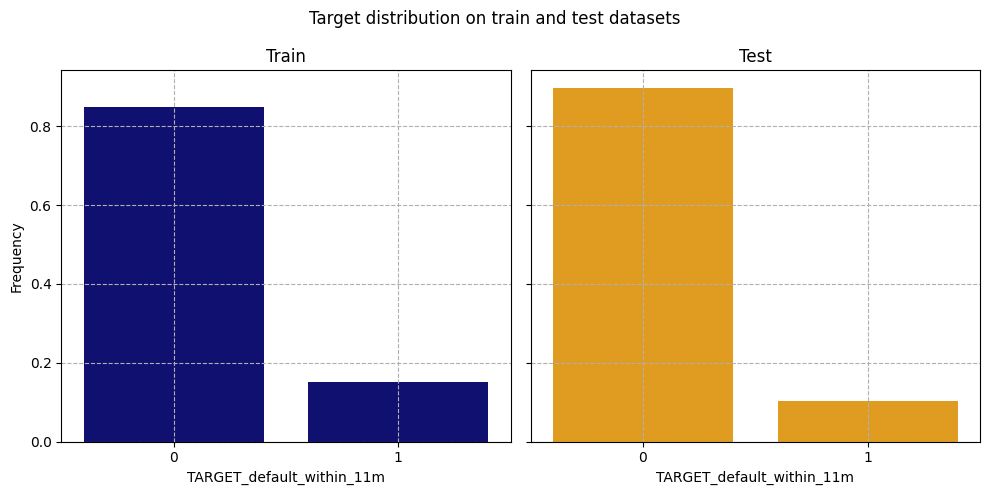

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True, tight_layout=True)
sns.barplot(train[target].value_counts(1), ax=ax[0], label='train', color='navy', legend=False)
sns.barplot(test[target].value_counts(1), ax=ax[1], label='test', color='orange', legend=False)
fig.suptitle('Target distribution on train and test datasets')
ax[0].set_title('Train')
ax[1].set_title('Test')
ax[0].set_ylabel('Frequency')
ax[0].grid(linestyle='--')
ax[1].grid(linestyle='--')
plt.show()

## Features that are based on credit models

In [12]:
# check if feature has 'limit' in its name
crf = list(set([col for col in train.columns if 'lim' in col] + [col for col in train.columns if 'ris' in col]))

set([c for c in train.columns if c not in crf])

{'TARGET_default_within_11m',
 'avg_final_numeric_prediction_prev_6mo',
 'carteira_cred_sum',
 'chk_esp_cred_rot_a_vencer_sum',
 'cnt_declined_reasons',
 'credit_a_vencer_sum',
 'date_reference',
 'days_since_oldest_board_member',
 'days_since_stopped_simples',
 'fake_cnpj',
 'general_a_vencer_over180d',
 'general_a_vencer_sum',
 'general_a_vencer_under180d',
 'general_a_vencer_under30d',
 'general_coobrigacoes_sum',
 'general_cred_de_liberar_sum',
 'general_lost_pct_cart_cred',
 'general_lost_sum',
 'general_prejuizo_sum',
 'general_vencido_max_prev_6mo',
 'general_vencido_pct_carteira_cred__max_prev_6mo',
 'general_vencido_sum',
 'is_not_able_to_calc_interest',
 'min_lt_ir3_prev_6mo',
 'primary_median_ir3_prev_6mo',
 'random_feature1',
 'random_feature2',
 'special_inter_rate',
 'v001r_social_capital',
 'v204r_is_popular_domain',
 'v254r_cnt_board_memebers',
 'years_since_first_relationship'}

In [13]:
train[keys + ['chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo', 'chk_esp_cred_rot_a_vencer_pct_risco', 'risco_total']]

,fake_cnpj,date_reference,chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo,chk_esp_cred_rot_a_vencer_pct_risco,risco_total
0,27,2021-05-01,0.000000,0.000000e+00,74773908.77
1,76,2021-05-01,0.064502,6.450210e-02,45669.21
2,82,2020-12-01,0.000688,1.065954e-05,4806963.08
3,141,2020-10-01,0.013340,6.904611e-06,1819074.14
4,145,2021-04-01,0.000033,1.692868e-07,27940753.36
...,...,...,...,...,...
5253,116324,2020-09-01,0.017531,0.000000e+00,285477.48
5254,116333,2020-12-01,0.002165,0.000000e+00,7940853.40
5255,116336,2021-03-01,0.023166,0.000000e+00,263964.03
5256,116345,2021-01-01,0.004916,4.916285e-03,174859.66


## Correlations

## Feature correlation with Target

In [14]:
# linear correlation (Pearson) between features and target
correlation_feature_target_dict = {}
for feature in decimal_features + integer_features:
    correlation_feature_target_dict[feature] = train[[target, feature]].corr('pearson')[target][feature]

correlation_feature_target_df = pd.DataFrame(correlation_feature_target_dict, index=['correlation']).T
correlation_feature_target_df['abs_correlation'] = correlation_feature_target_df['correlation'].abs()
correlation_feature_target_df.sort_values(by='abs_correlation', ascending=False)

,correlation,abs_correlation
general_lost_pct_risco,0.337986,0.337986
general_vencido_sum_sum_pct_risco,0.331025,0.331025
cnt_declined_reasons,0.275776,0.275776
general_limite_de_cred_sum_pct_risco,-0.224764,0.224764
general_a_vencer_pct_risco,0.222294,0.222294
general_lost_pct_cart_cred,0.221435,0.221435
general_vencido_pct_risco_max_prev_6mo,0.197289,0.197289
general_vencido_pct_carteira_cred__max_prev_6mo,0.167202,0.167202
days_since_oldest_board_member,-0.161329,0.161329
v254r_cnt_board_memebers,-0.147776,0.147776


In [15]:
# Apparently, the linear correlation between the features and the target is very low.
# This may be a problem for linear models.
# The use of non-linear models to solve this problem is an alternative.

In [16]:
# Repeating the process but looking for non-linear correlation using the Spearman correlation, as we don't know
# yet the distributions of the features. 
# The Spearman correlation is a non-parametric measure of rank correlation. It assesses how well the relationship
# between two variables can be described using a monotonic function.

nl_correlation_feature_target_dict = {}
for feature in decimal_features + integer_features:
    nl_correlation_feature_target_dict[feature] = train[[target, feature]].corr('spearman')[target][feature]

nl_correlation_feature_target_df = pd.DataFrame(nl_correlation_feature_target_dict, index=['correlation']).T
nl_correlation_feature_target_df['abs_correlation'] = nl_correlation_feature_target_df['correlation'].abs()
nl_correlation_feature_target_df.sort_values(by='abs_correlation', ascending=False)

,correlation,abs_correlation
general_vencido_sum_sum_pct_risco,0.303690,0.303690
general_lost_pct_risco,0.303673,0.303673
general_lost_pct_cart_cred,0.302678,0.302678
general_vencido_sum,0.298705,0.298705
general_lost_sum,0.297896,0.297896
general_limite_de_cred_sum,-0.281853,0.281853
cnt_declined_reasons,0.273499,0.273499
general_limite_de_cred_360m_sum,-0.268514,0.268514
general_vencido_pct_risco_max_prev_6mo,0.260031,0.260031
general_vencido_pct_carteira_cred__max_prev_6mo,0.253762,0.253762


### Filtering out the features with almost no correlation with the target feature

In [17]:
# assuming correlation >= 0.5 as a strong correlation, correlation >= 0.3 as a moderate correlation and
# correlation >= 0.1 as a weak correlation, we can select the features that have at least a weak correlation,
# as we may extract some information from them using a boosting model, for example.

features = list(
    nl_correlation_feature_target_df
    .query('abs_correlation >= 0.1')
    .sort_values(by='abs_correlation', ascending=False)
    .index
    )
features

['general_vencido_sum_sum_pct_risco',
 'general_lost_pct_risco',
 'general_lost_pct_cart_cred',
 'general_vencido_sum',
 'general_lost_sum',
 'general_limite_de_cred_sum',
 'cnt_declined_reasons',
 'general_limite_de_cred_360m_sum',
 'general_vencido_pct_risco_max_prev_6mo',
 'general_vencido_pct_carteira_cred__max_prev_6mo',
 'general_limite_de_cred_sum_pct_risco',
 'general_vencido_max_prev_6mo',
 'general_a_vencer_pct_risco',
 'v254r_cnt_board_memebers',
 'days_since_oldest_board_member',
 'years_since_first_relationship',
 'general_a_vencer_weighted_periodo_div_pct_risco',
 'chk_esp_cred_rot_a_vencer_pct_risco',
 'chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo',
 'general_limite_trend_6mo',
 'chk_esp_cred_rot_a_vencer_sum',
 'v204r_is_popular_domain',
 'is_not_able_to_calc_interest',
 'risco_total']

### Analyzing the correlation between the features to avoid multicollinearity

In [18]:
# check to identify columns with many zeros
train[features].apply(lambda x: (x == 0).mean()).sort_values(ascending=False)

general_vencido_sum_sum_pct_risco                   0.911373
general_vencido_sum                                 0.911373
general_lost_pct_cart_cred                          0.907189
general_lost_sum                                    0.907189
general_lost_pct_risco                              0.907189
cnt_declined_reasons                                0.866109
general_vencido_pct_risco_max_prev_6mo              0.779194
general_vencido_max_prev_6mo                        0.779194
general_vencido_pct_carteira_cred__max_prev_6mo     0.779194
v204r_is_popular_domain                             0.590529
chk_esp_cred_rot_a_vencer_sum                       0.587486
chk_esp_cred_rot_a_vencer_pct_risco                 0.587486
chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo    0.358692
is_not_able_to_calc_interest                        0.297642
general_limite_trend_6mo                            0.253328
general_limite_de_cred_360m_sum                     0.208825
general_limite_de_cred_s

In [19]:
# checking if high correlation means lack of information
(train[['general_vencido_sum_sum_pct_risco', 'general_vencido_sum', 'general_lost_pct_cart_cred', 'general_lost_sum', 'general_lost_pct_risco']]
    .query('general_vencido_sum_sum_pct_risco == 0 and general_vencido_sum == 0 and general_lost_pct_cart_cred == 0 and general_lost_sum == 0 and general_lost_pct_risco == 0')).shape[0], train.shape[0]

(4770, 5258)

In [20]:
# checking if high correlation means lack of information
general_features = [c for c in train.columns if 'general' in c]
general_features_equals_zero_query__and = 'general_vencido_sum_sum_pct_risco == 0 and general_vencido_sum == 0 and general_lost_pct_cart_cred == 0 and general_lost_sum == 0 and general_lost_pct_risco == 0'
general_features_diff_zero_query__or = 'general_vencido_sum_sum_pct_risco != 0 or general_vencido_sum != 0 or general_lost_pct_cart_cred != 0 or general_lost_sum != 0 or general_lost_pct_risco != 0'
train[general_features].query(general_features_equals_zero_query__and).shape[0], train.shape[0]

(4770, 5258)

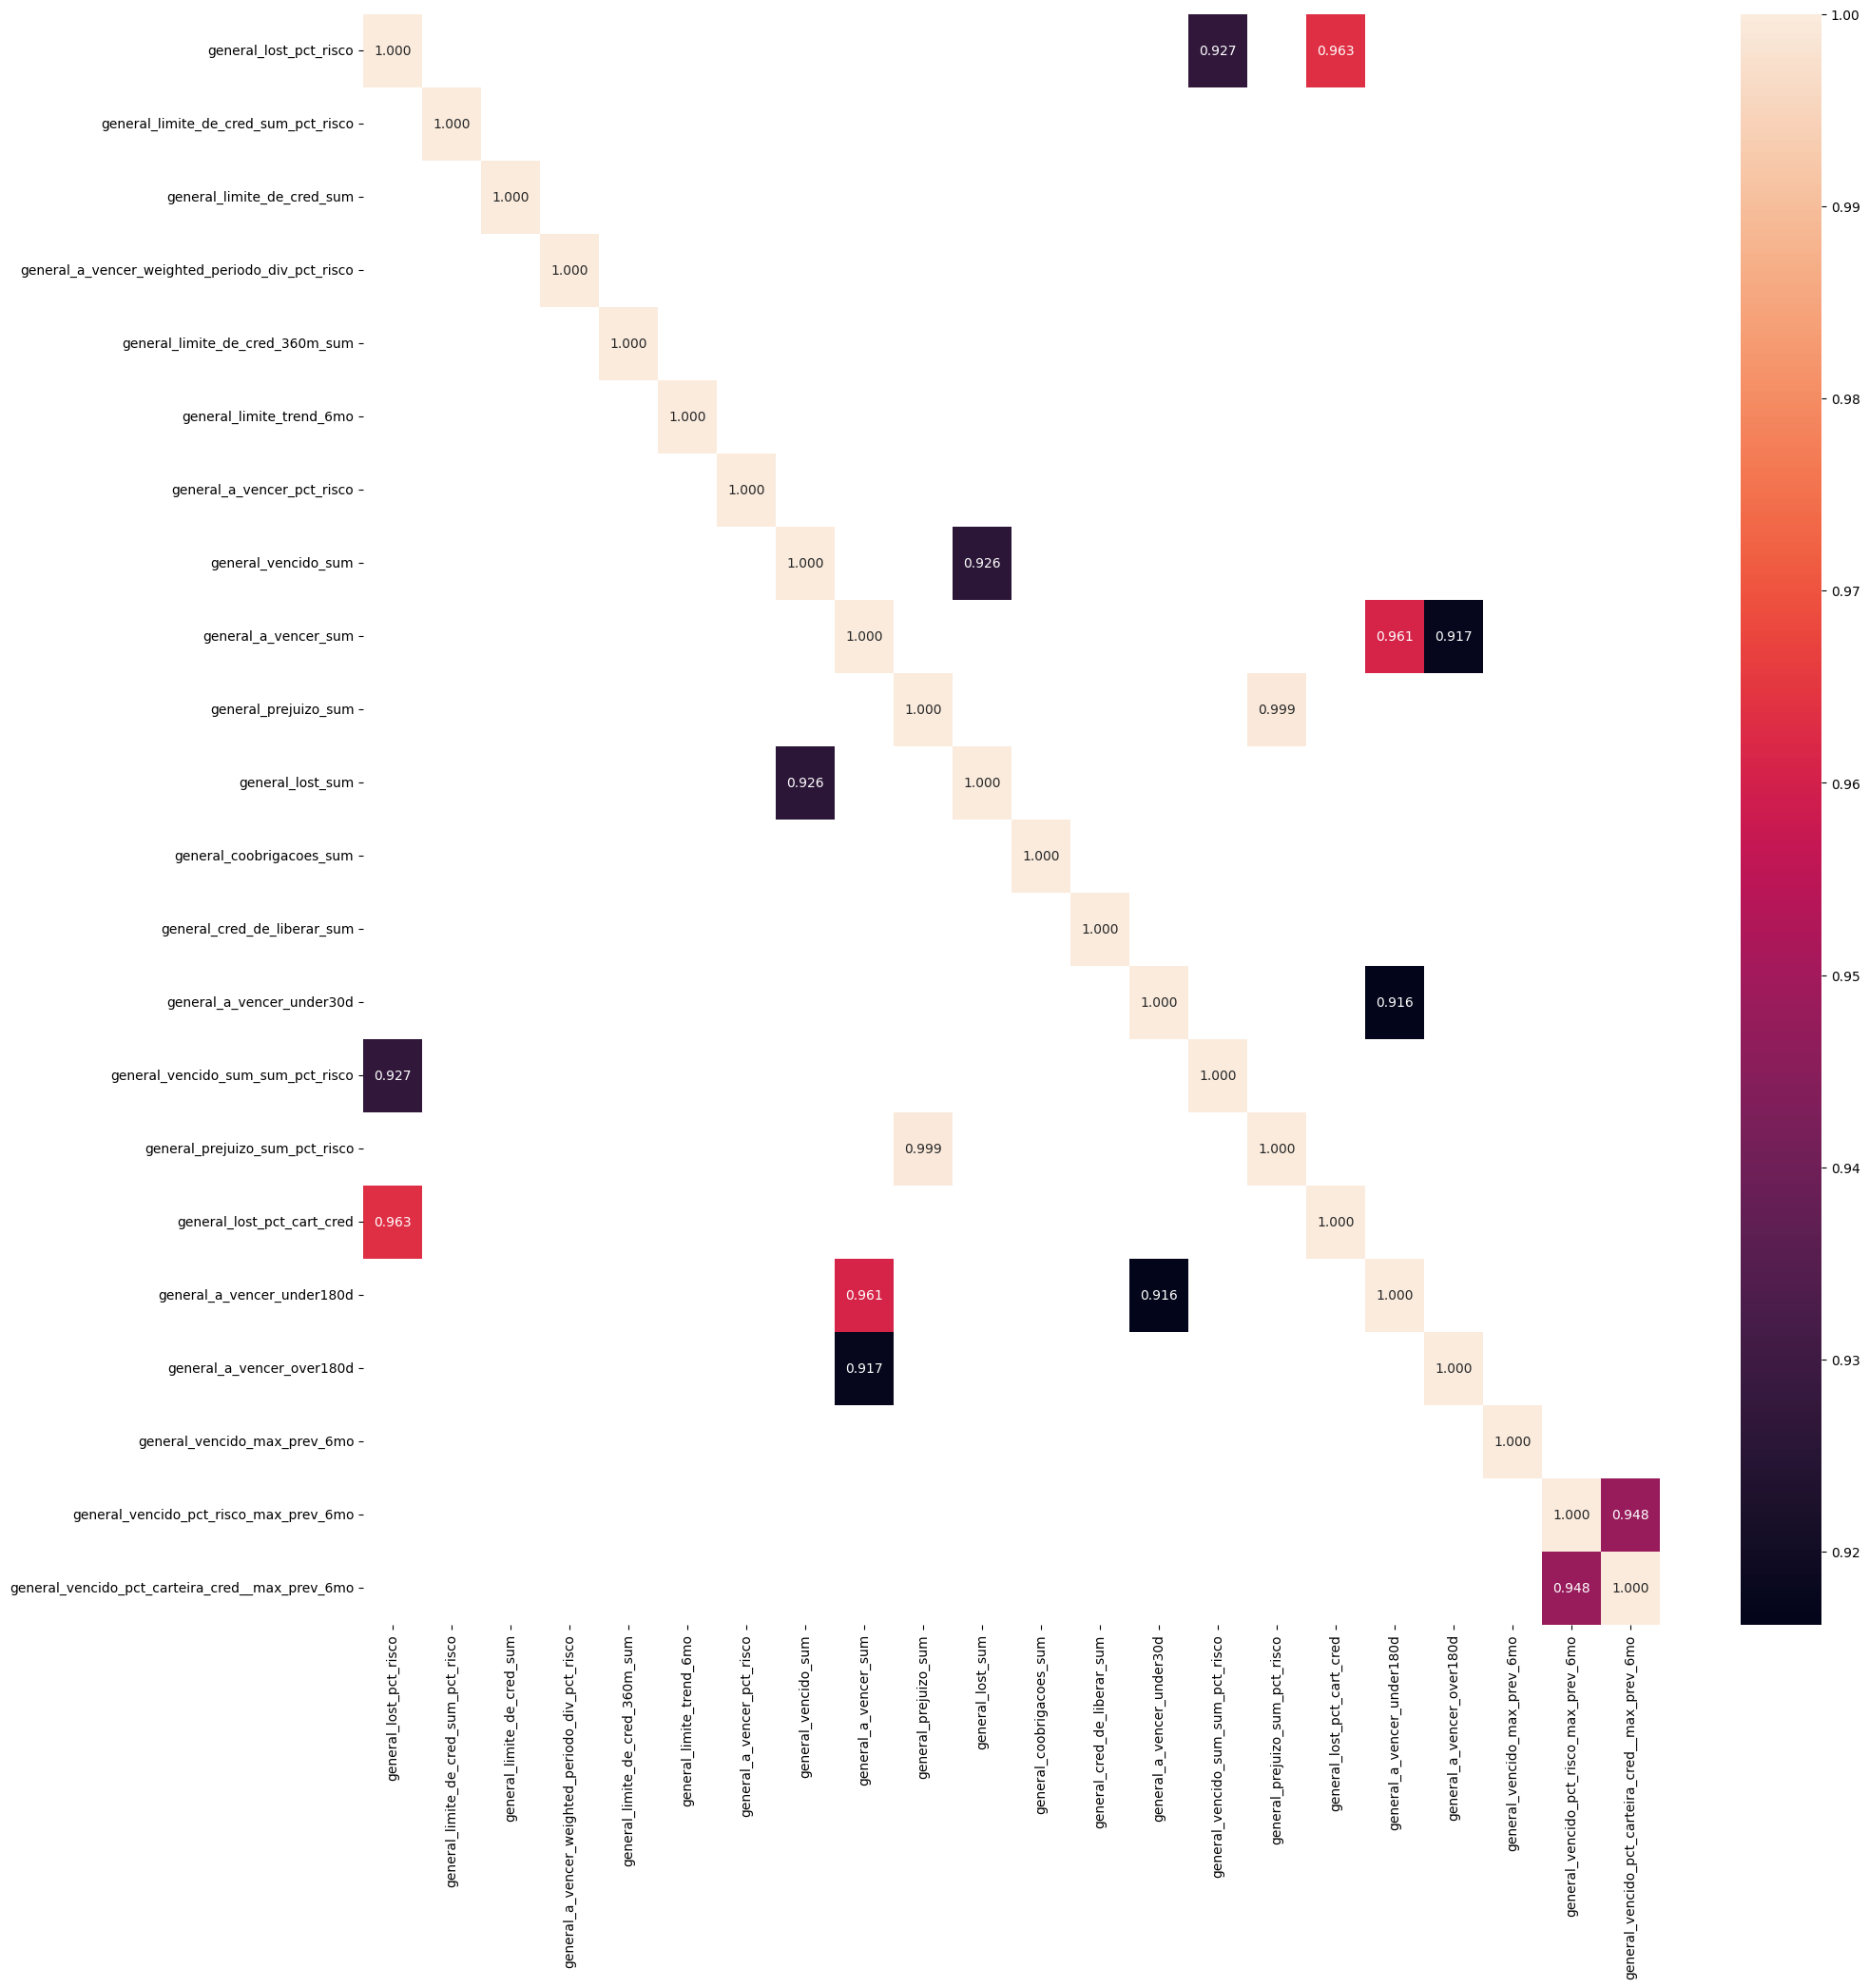

In [21]:
detailed_correlations1 = (
    train[general_features]
    .query(general_features_diff_zero_query__or)
    ).corr('spearman')

plt.figure(figsize=(len(general_features), len(general_features)))
sns.heatmap(detailed_correlations1, annot=True, fmt='.3f', mask=detailed_correlations1 < 0.9)
plt.show()

In [22]:
# pairs of features in detailed_correlations1 that have a correlation greater than 0.9
general_feature_pairs_with_high_correlation = []
for i in range(detailed_correlations1.shape[0]):
    for j in range(i):
        if detailed_correlations1.iloc[i, j] > 0.9:
            general_feature_pairs_with_high_correlation.append((detailed_correlations1.index[i], detailed_correlations1.columns[j]))

general_feature_pairs_with_high_correlation

[('general_lost_sum', 'general_vencido_sum'),
 ('general_vencido_sum_sum_pct_risco', 'general_lost_pct_risco'),
 ('general_prejuizo_sum_pct_risco', 'general_prejuizo_sum'),
 ('general_lost_pct_cart_cred', 'general_lost_pct_risco'),
 ('general_a_vencer_under180d', 'general_a_vencer_sum'),
 ('general_a_vencer_under180d', 'general_a_vencer_under30d'),
 ('general_a_vencer_over180d', 'general_a_vencer_sum'),
 ('general_vencido_pct_carteira_cred__max_prev_6mo',
  'general_vencido_pct_risco_max_prev_6mo')]

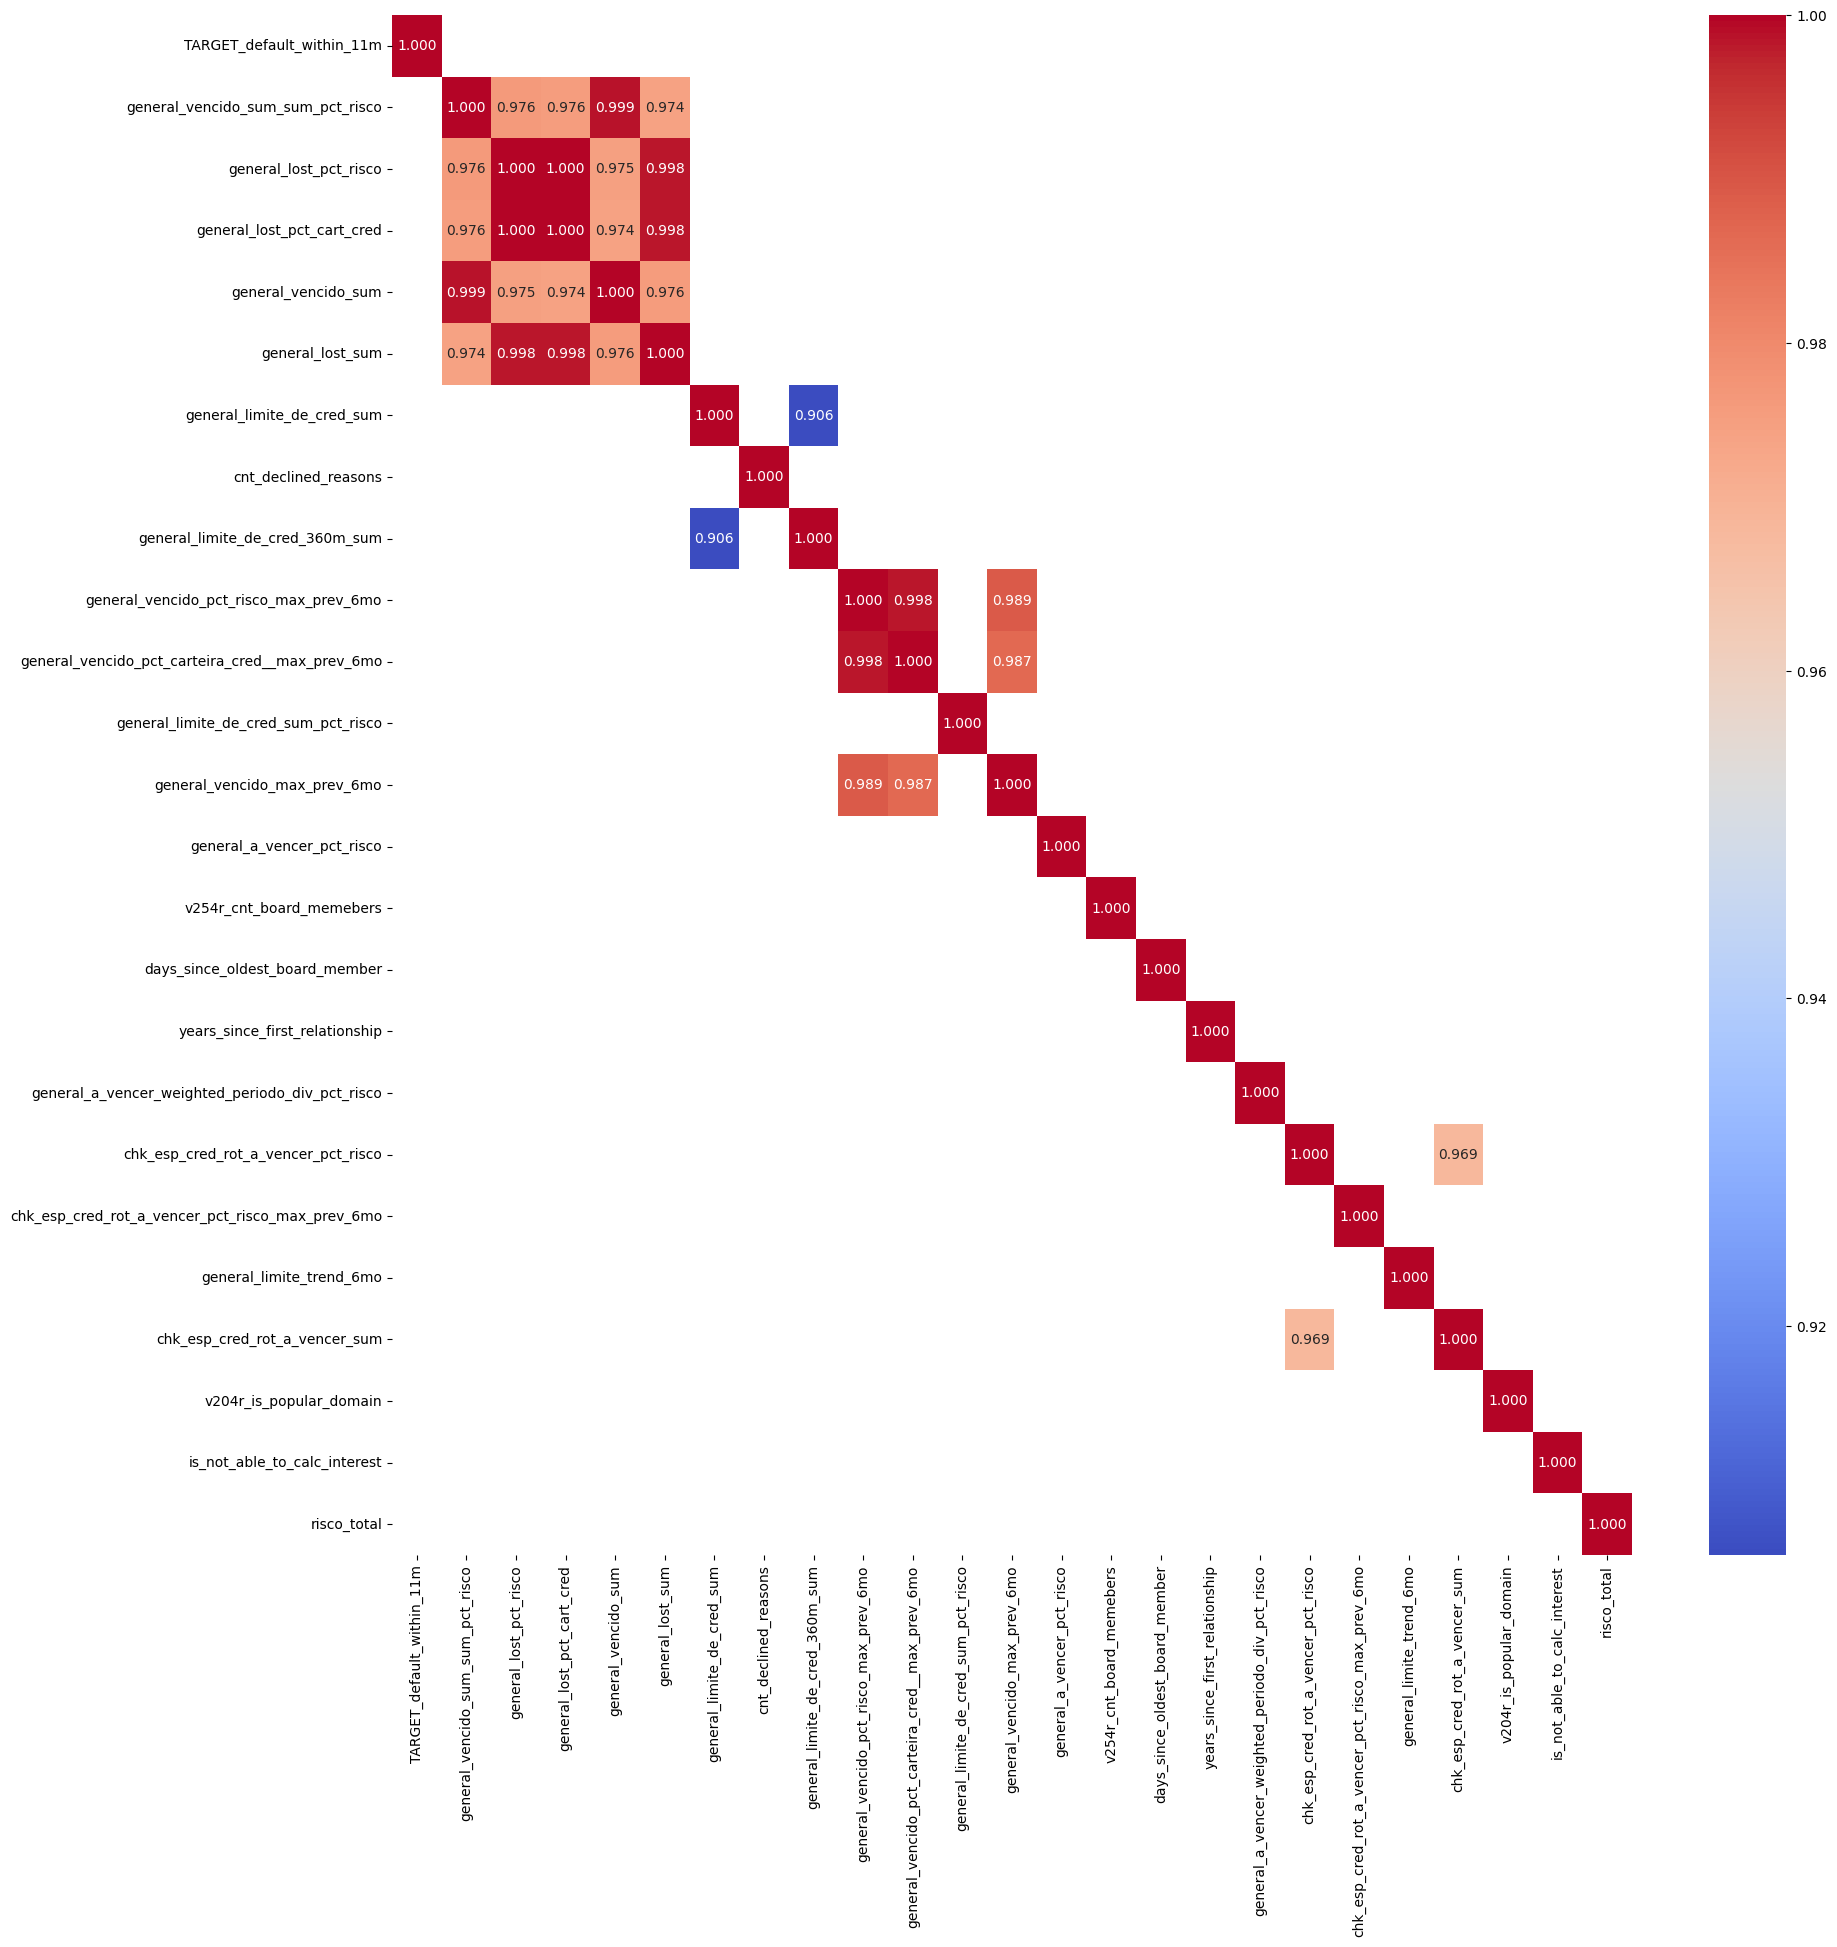

In [23]:
# Plotting the Pearson's correlation matrix
correlations = train[[target] + features].corr('spearman')
plt.figure(figsize=(20, 20))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.3f', mask=correlations < 0.9)
plt.show()

In [24]:
correlations_features_with_high_correlation = []
for i in range(correlations.shape[0]):
    for j in range(i):
        if correlations.iloc[i, j] > 0.9:
            correlations_features_with_high_correlation.append((correlations.index[i], correlations.columns[j]))

correlations_features_with_high_correlation

[('general_lost_pct_risco', 'general_vencido_sum_sum_pct_risco'),
 ('general_lost_pct_cart_cred', 'general_vencido_sum_sum_pct_risco'),
 ('general_lost_pct_cart_cred', 'general_lost_pct_risco'),
 ('general_vencido_sum', 'general_vencido_sum_sum_pct_risco'),
 ('general_vencido_sum', 'general_lost_pct_risco'),
 ('general_vencido_sum', 'general_lost_pct_cart_cred'),
 ('general_lost_sum', 'general_vencido_sum_sum_pct_risco'),
 ('general_lost_sum', 'general_lost_pct_risco'),
 ('general_lost_sum', 'general_lost_pct_cart_cred'),
 ('general_lost_sum', 'general_vencido_sum'),
 ('general_limite_de_cred_360m_sum', 'general_limite_de_cred_sum'),
 ('general_vencido_pct_carteira_cred__max_prev_6mo',
  'general_vencido_pct_risco_max_prev_6mo'),
 ('general_vencido_max_prev_6mo', 'general_vencido_pct_risco_max_prev_6mo'),
 ('general_vencido_max_prev_6mo',
  'general_vencido_pct_carteira_cred__max_prev_6mo'),
 ('chk_esp_cred_rot_a_vencer_sum', 'chk_esp_cred_rot_a_vencer_pct_risco')]

In [25]:
# pairs present in both correlations_features_with_high_correlation and general_feature_pairs_with_high_correlation
general_features_to_remove = set(correlations_features_with_high_correlation) & set(general_feature_pairs_with_high_correlation)
general_features_to_remove
# we may remove these features as even considering values other than zero they are highly correlated

{('general_lost_pct_cart_cred', 'general_lost_pct_risco'),
 ('general_lost_sum', 'general_vencido_sum'),
 ('general_vencido_pct_carteira_cred__max_prev_6mo',
  'general_vencido_pct_risco_max_prev_6mo')}

In [26]:
features_to_remove = []
for feature_idx, feature1 in enumerate(features):
    for feature2 in features[feature_idx + 1:]:
        if abs(correlations[feature1][feature2]) > 0.9:
            if 'general' in feature1 and 'general' in feature2 and set([feature1, feature2]) in general_features_to_remove:        
                print(f'{feature1} and {feature2} have a correlation greater than 0.9')
                print(f'removing {feature2} from the list of features')
                features_to_remove.append(feature2)
            elif 'general' not in feature1 or 'general' not in feature2:
                print(f'{feature1} and {feature2} have a correlation greater than 0.9')
                print(f'removing {feature2} from the list of features')
                features_to_remove.append(feature2)

chk_esp_cred_rot_a_vencer_pct_risco and chk_esp_cred_rot_a_vencer_sum have a correlation greater than 0.9
removing chk_esp_cred_rot_a_vencer_sum from the list of features


In [27]:
features_to_keep = list(set(features) - set(features_to_remove))
features_to_keep

['v204r_is_popular_domain',
 'days_since_oldest_board_member',
 'risco_total',
 'cnt_declined_reasons',
 'general_limite_de_cred_360m_sum',
 'general_lost_pct_risco',
 'general_vencido_max_prev_6mo',
 'general_vencido_sum',
 'is_not_able_to_calc_interest',
 'general_lost_sum',
 'general_lost_pct_cart_cred',
 'general_a_vencer_weighted_periodo_div_pct_risco',
 'years_since_first_relationship',
 'general_limite_de_cred_sum_pct_risco',
 'general_vencido_pct_risco_max_prev_6mo',
 'v254r_cnt_board_memebers',
 'general_limite_de_cred_sum',
 'general_limite_trend_6mo',
 'chk_esp_cred_rot_a_vencer_pct_risco',
 'general_vencido_sum_sum_pct_risco',
 'general_vencido_pct_carteira_cred__max_prev_6mo',
 'general_a_vencer_pct_risco',
 'chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo']

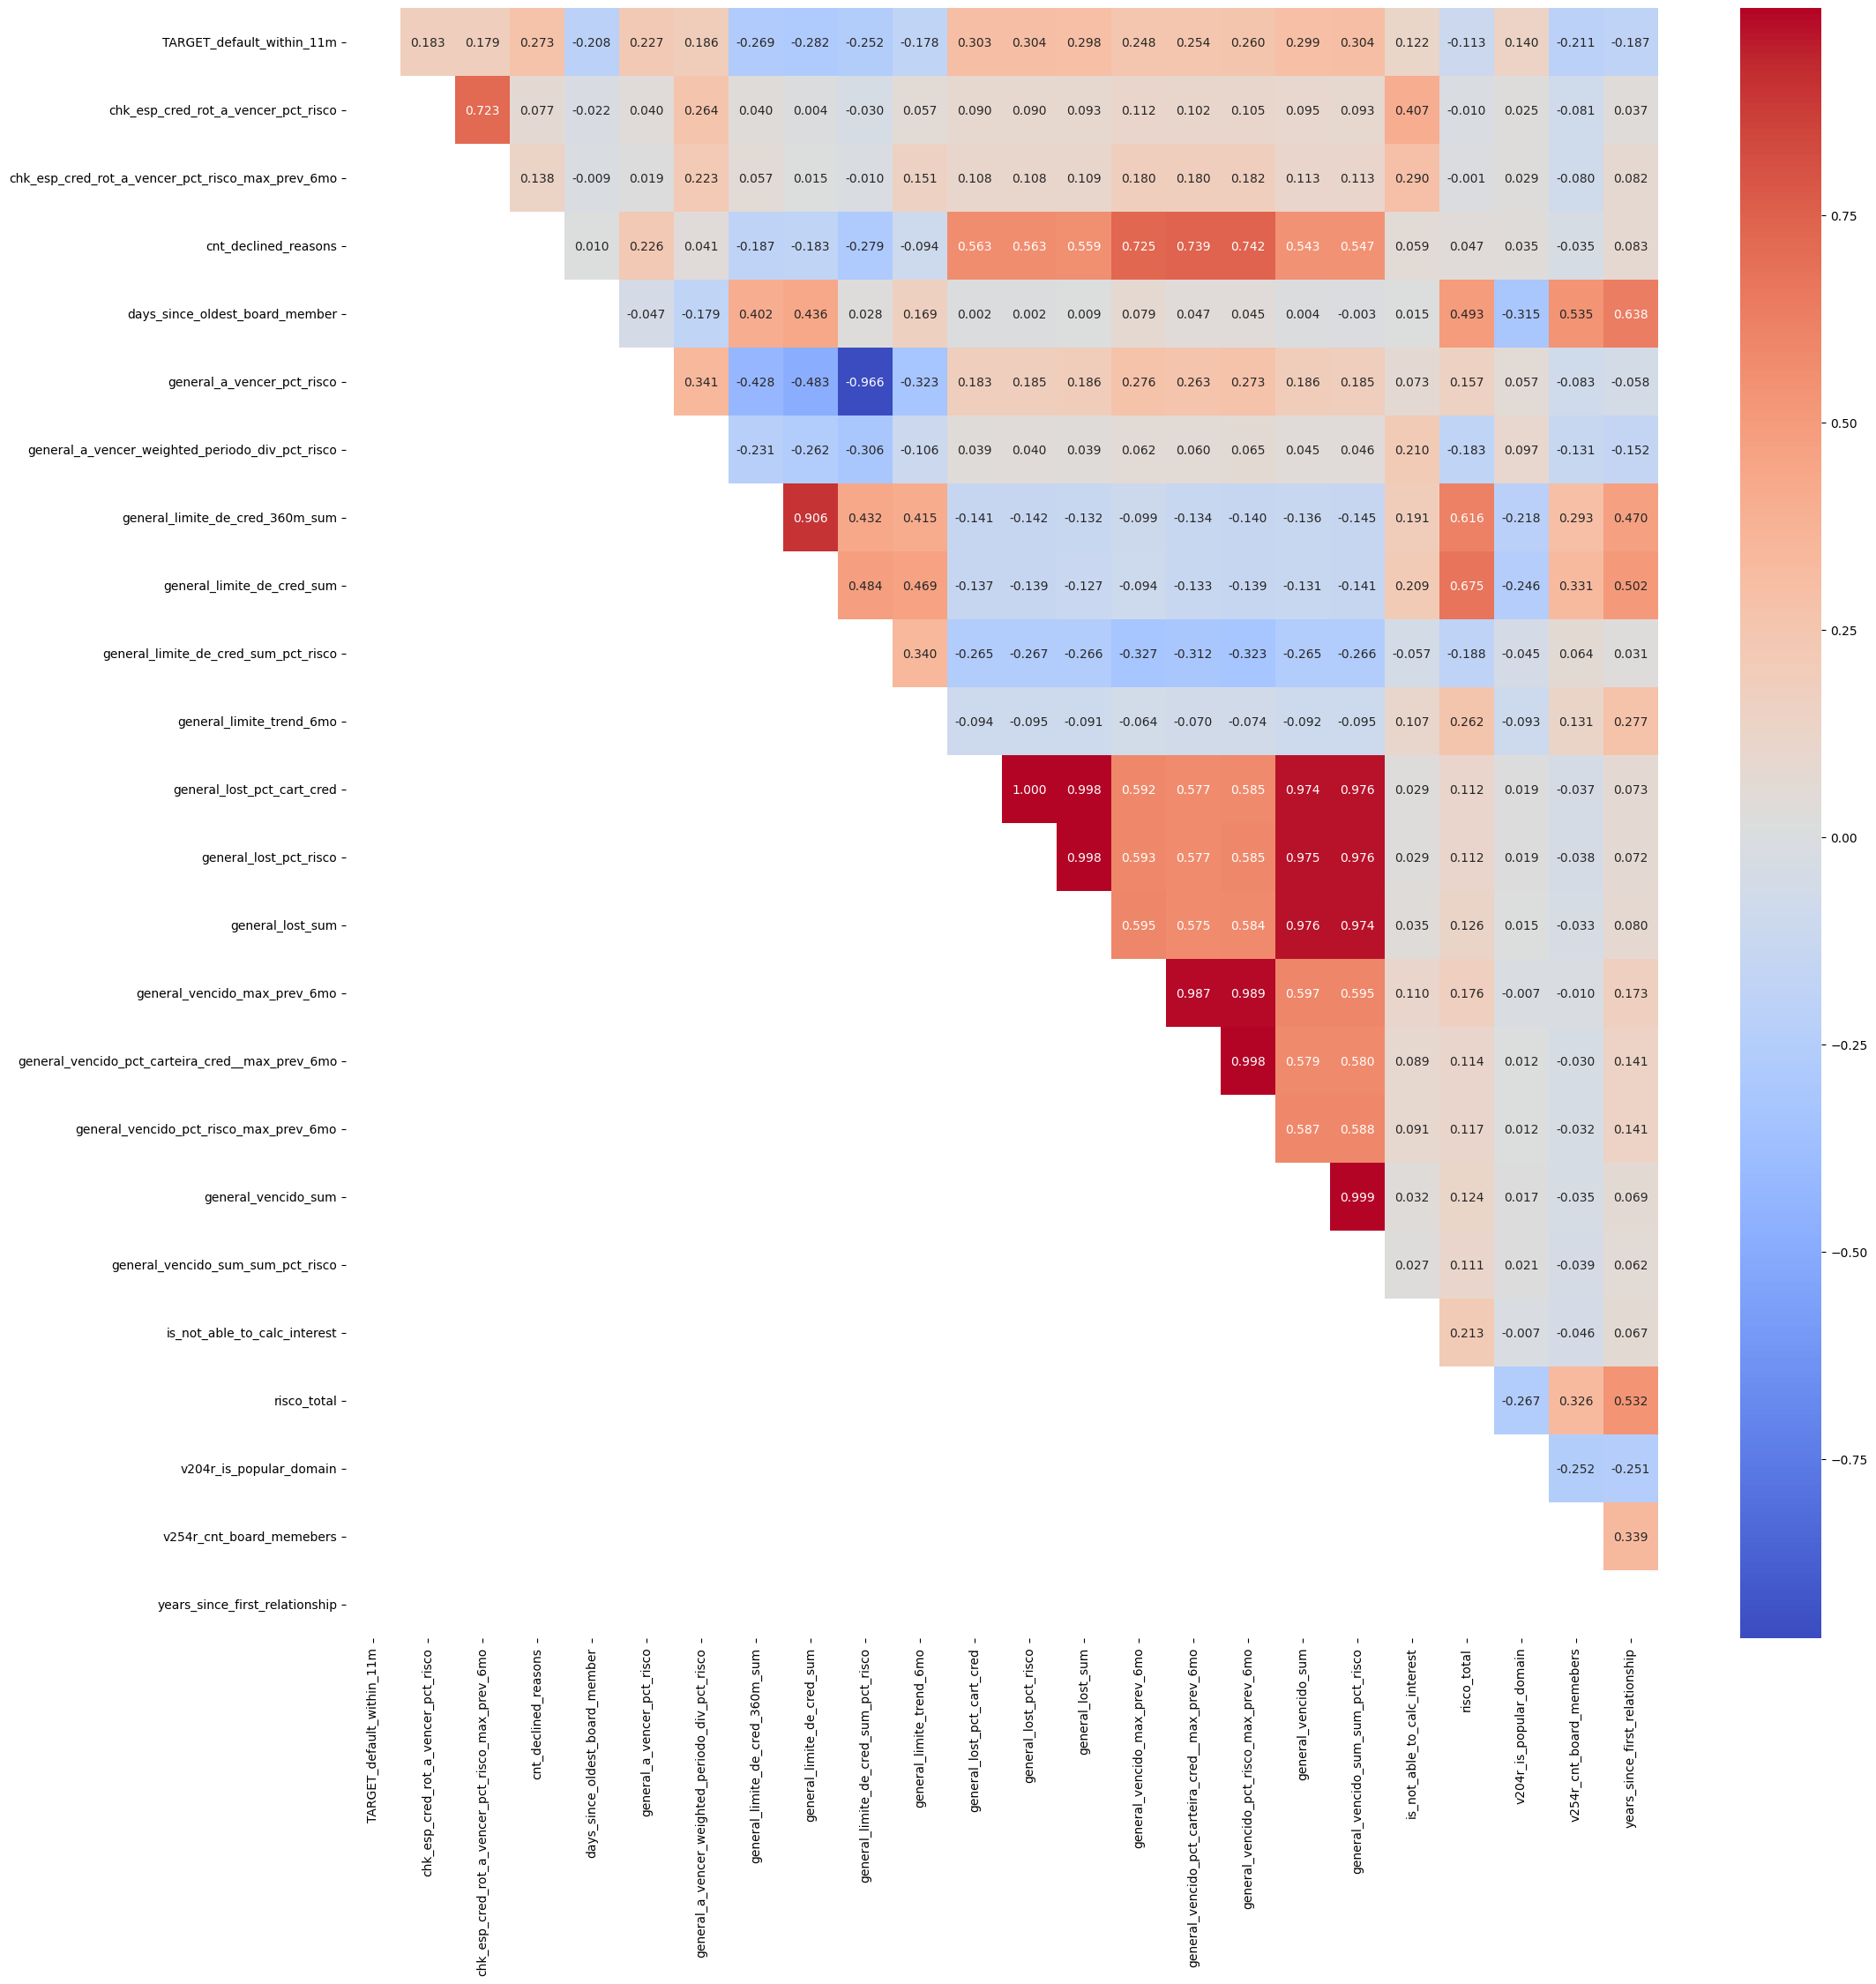

In [28]:
# Plotting the Pearson's correlation matrix
correlations = train[[target] + sorted(features_to_keep)].corr('spearman')
plt.figure(figsize=(len(features_to_keep) + 1, len(features_to_keep) + 1))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.3f', mask=np.tril(correlations))
plt.show()

## Feature Distribution Plots

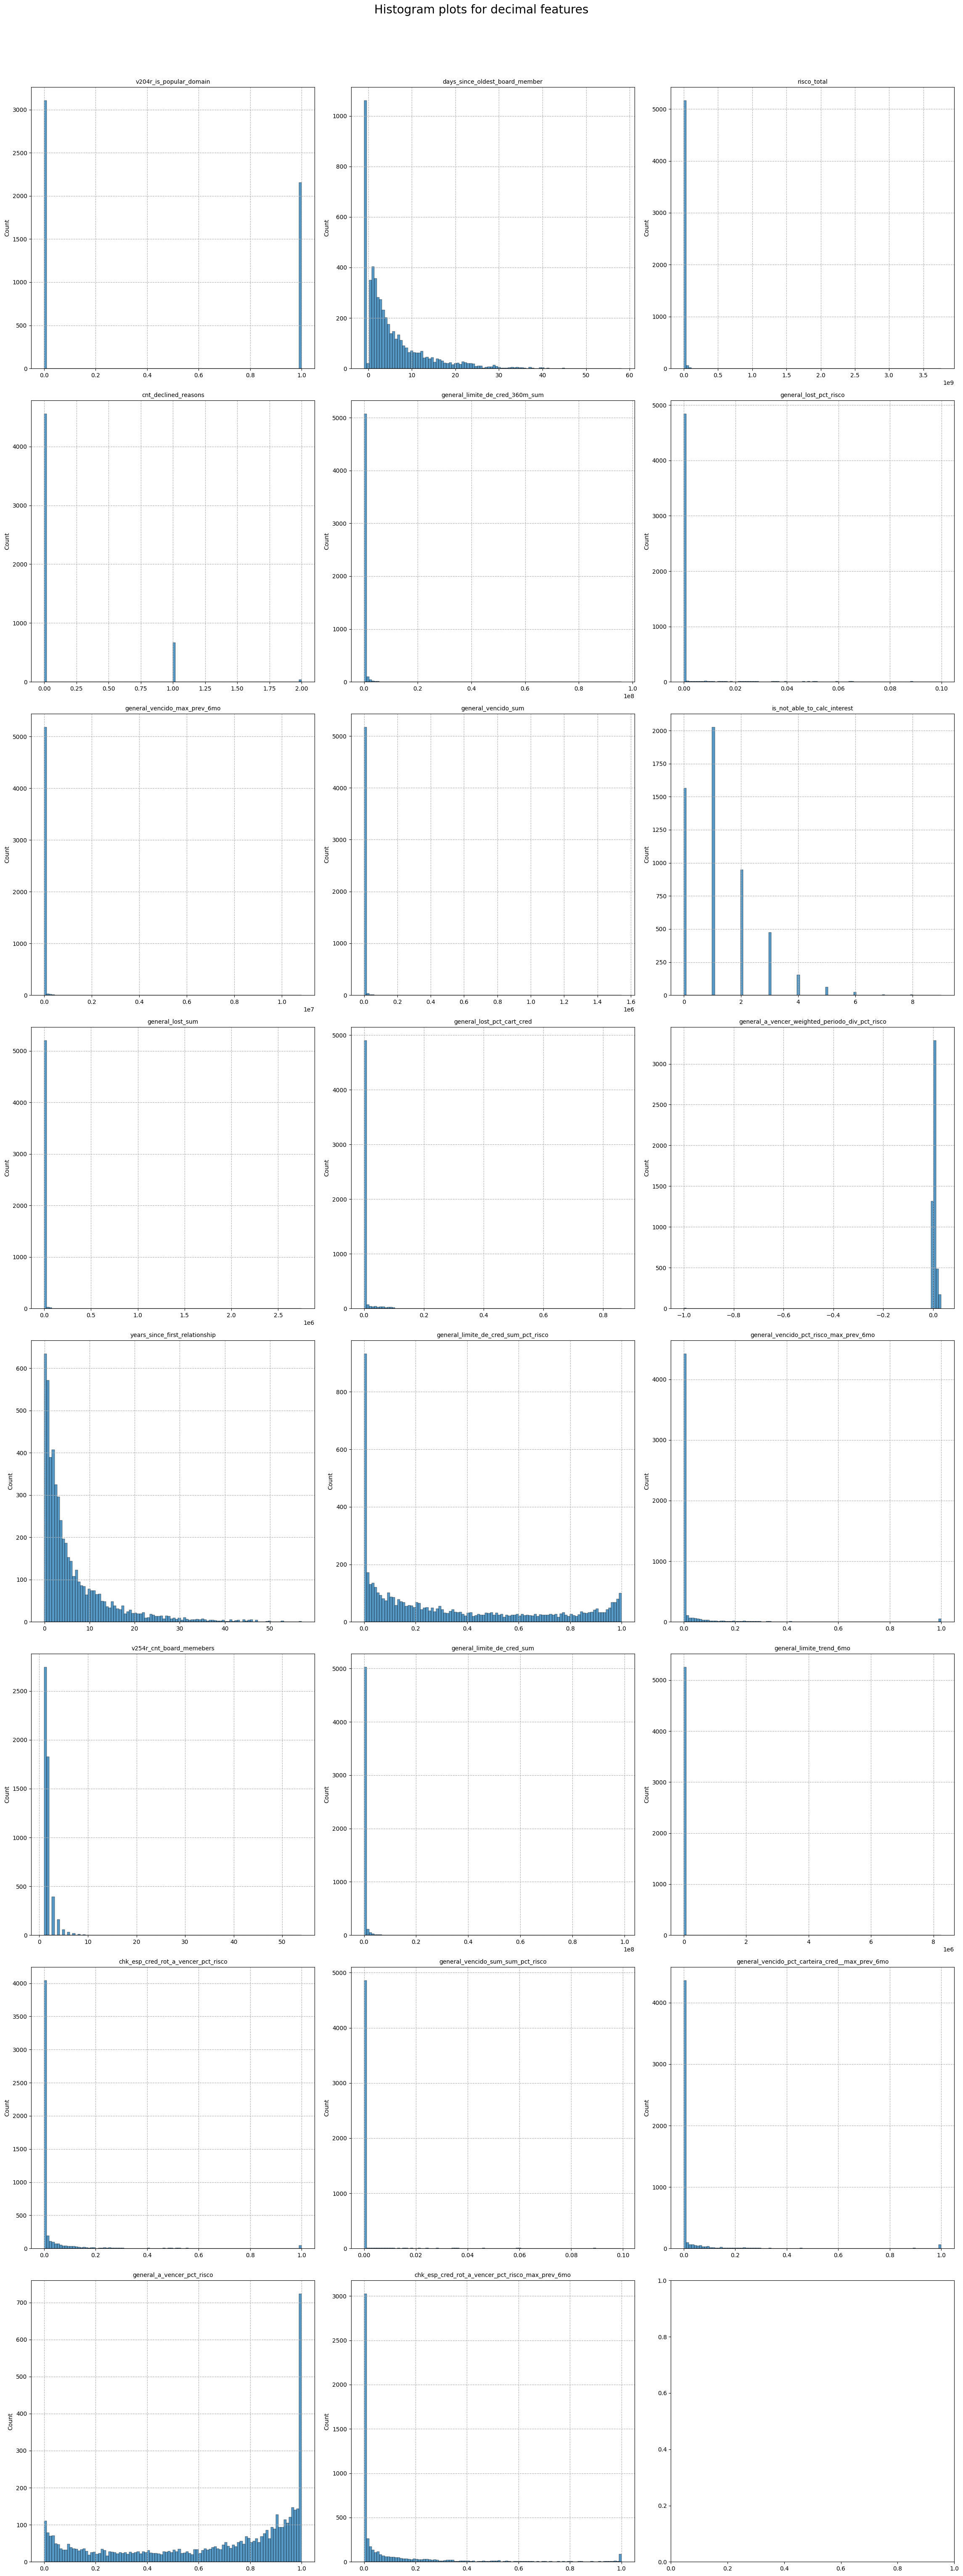

In [29]:
ncols = 3
nrows = int(np.ceil(len(features_to_keep) / ncols))
fig, ax = plt.subplots(nrows, ncols, figsize=(len(features_to_keep), 60), tight_layout=True)
for idx, feature in enumerate(features_to_keep):
    ax_id = ax[idx // ncols, idx % ncols]
    sns.histplot(train[feature], legend=False, ax=ax_id, bins=100)
    ax_id.set_title(feature, fontsize=10)
    ax_id.grid(linestyle='--')
    ax_id.set_xlabel('')

fig.suptitle('Histogram plots for decimal features', fontsize=20, y=1.02)
plt.show()

In [30]:
# some of the features above may have extreme values that require further investigation

In [31]:
features_to_keep

['v204r_is_popular_domain',
 'days_since_oldest_board_member',
 'risco_total',
 'cnt_declined_reasons',
 'general_limite_de_cred_360m_sum',
 'general_lost_pct_risco',
 'general_vencido_max_prev_6mo',
 'general_vencido_sum',
 'is_not_able_to_calc_interest',
 'general_lost_sum',
 'general_lost_pct_cart_cred',
 'general_a_vencer_weighted_periodo_div_pct_risco',
 'years_since_first_relationship',
 'general_limite_de_cred_sum_pct_risco',
 'general_vencido_pct_risco_max_prev_6mo',
 'v254r_cnt_board_memebers',
 'general_limite_de_cred_sum',
 'general_limite_trend_6mo',
 'chk_esp_cred_rot_a_vencer_pct_risco',
 'general_vencido_sum_sum_pct_risco',
 'general_vencido_pct_carteira_cred__max_prev_6mo',
 'general_a_vencer_pct_risco',
 'chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo']

In [32]:
train['general_a_vencer_weighted_periodo_div_pct_risco'].describe()

count    5258.000000
mean        0.005298
std         0.031607
min        -1.000000
25%         0.002325
50%         0.004274
75%         0.007955
max         0.033333
Name: general_a_vencer_weighted_periodo_div_pct_risco, dtype: float64

In [33]:
train[train['general_a_vencer_weighted_periodo_div_pct_risco'] < 0][keys + ['general_a_vencer_weighted_periodo_div_pct_risco', target]]

,fake_cnpj,date_reference,general_a_vencer_weighted_periodo_div_pct_risco,TARGET_default_within_11m
850,7586,2021-02-01,-1.0,0
911,8144,2021-03-01,-1.0,0
2418,22379,2021-05-01,-1.0,0
3283,31428,2021-05-01,-1.0,1
3432,32875,2021-05-01,-1.0,1


In [34]:
ids_to_check = train[train['general_a_vencer_weighted_periodo_div_pct_risco'] < 0]['fake_cnpj'].unique()

In [35]:
train[train['fake_cnpj'].isin(ids_to_check)]['fake_cnpj'].shape, train[train['general_a_vencer_weighted_periodo_div_pct_risco'] < 0]['fake_cnpj'].shape

((5,), (5,))

In [36]:
train[train['general_a_vencer_weighted_periodo_div_pct_risco'] < 0][target].value_counts(1)
# I will remove these cases from the dataset, as it should not impact the model's performance
# Understanding what this -1.0 value means would be important, but we will continue with the model building process.

TARGET_default_within_11m
0    0.6
1    0.4
Name: proportion, dtype: float64

In [37]:
train = train[train['general_a_vencer_weighted_periodo_div_pct_risco'] >= 0]

In [38]:
train['general_vencido_sum_sum_pct_risco'].describe()

count    5253.000000
mean        0.002823
std         0.012493
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.099417
Name: general_vencido_sum_sum_pct_risco, dtype: float64

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


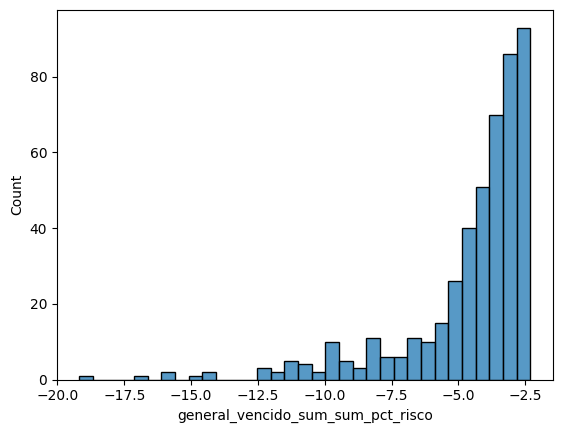

In [39]:
sns.histplot(np.log(train['general_vencido_sum_sum_pct_risco']))
plt.show()

# a log transformation for this feature may be useful

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


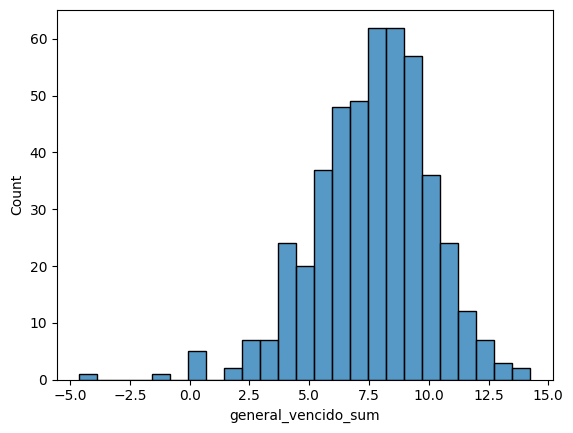

In [40]:
sns.histplot(np.log(train['general_vencido_sum']))
plt.show()

# a log transformation for this feature may be useful

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


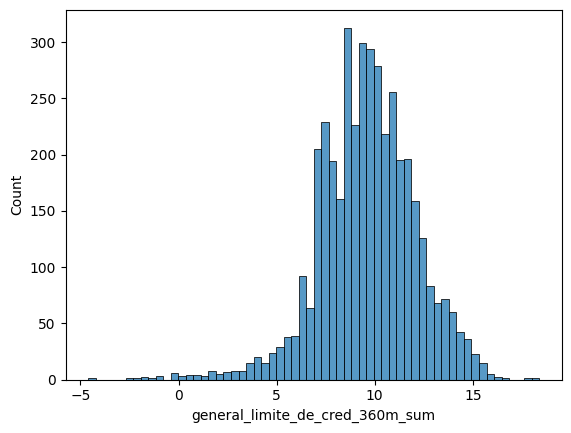

In [41]:
sns.histplot(np.log(train['general_limite_de_cred_360m_sum']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


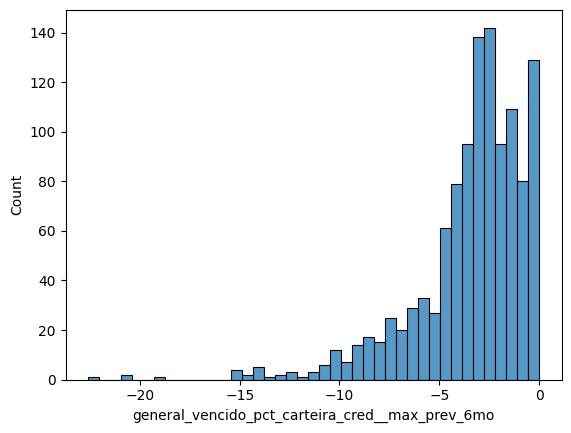

In [42]:
sns.histplot(np.log(train['general_vencido_pct_carteira_cred__max_prev_6mo']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


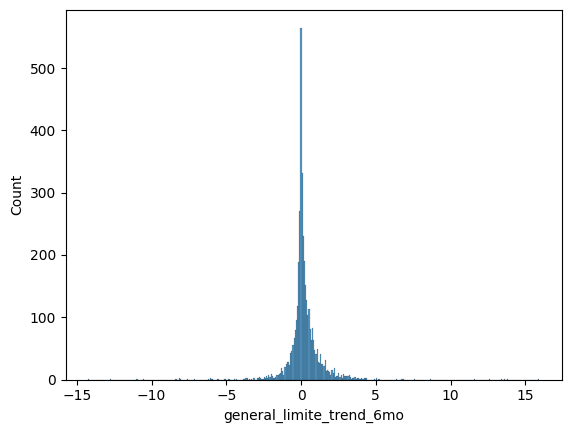

In [43]:
sns.histplot(np.log(train['general_limite_trend_6mo']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


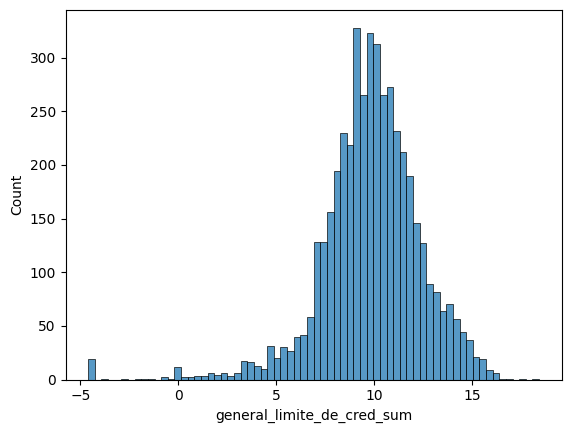

In [44]:
sns.histplot(np.log(train['general_limite_de_cred_sum']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


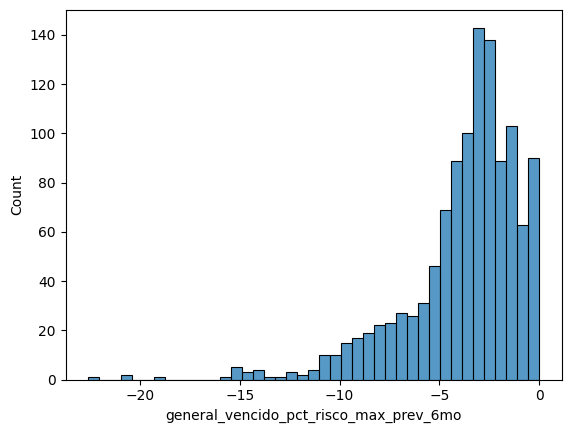

In [45]:
sns.histplot(np.log(train['general_vencido_pct_risco_max_prev_6mo']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


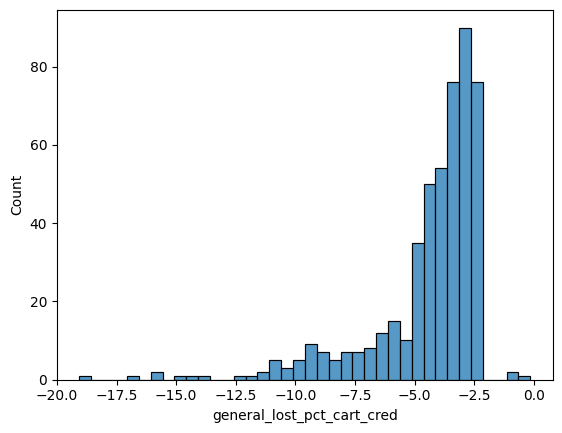

In [46]:
sns.histplot(np.log(train['general_lost_pct_cart_cred']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


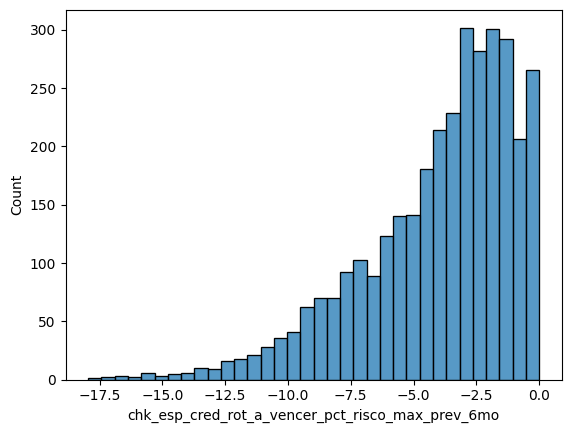

In [47]:
sns.histplot(np.log(train['chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


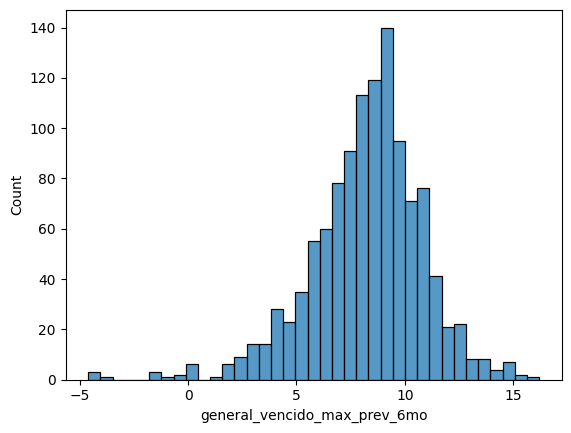

In [48]:
sns.histplot(np.log(train['general_vencido_max_prev_6mo']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


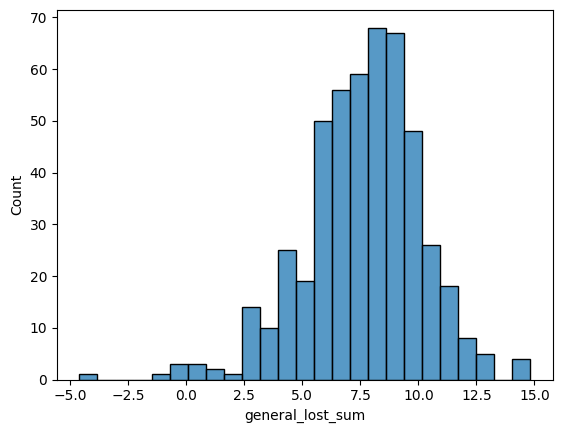

In [49]:
sns.histplot(np.log(train['general_lost_sum']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


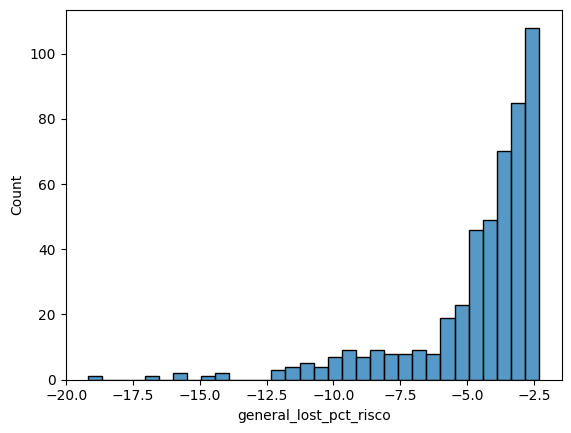

In [50]:
sns.histplot(np.log(train['general_lost_pct_risco']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


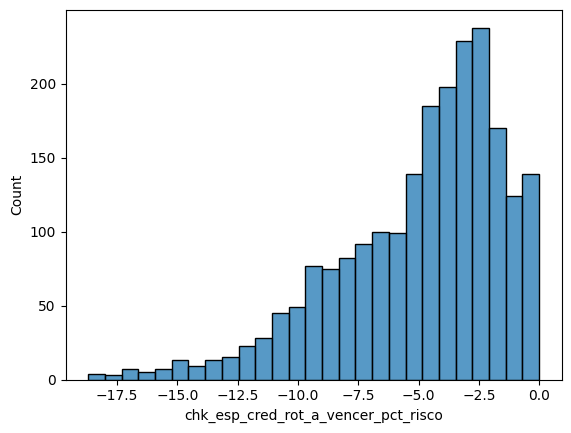

In [51]:
sns.histplot(np.log(train['chk_esp_cred_rot_a_vencer_pct_risco']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


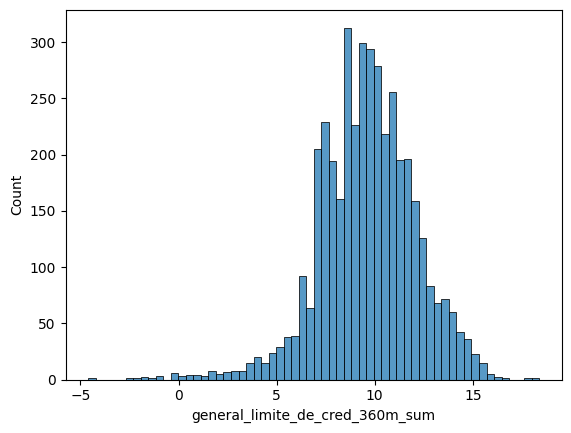

In [52]:
sns.histplot(np.log(train['general_limite_de_cred_360m_sum']))
plt.show()

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


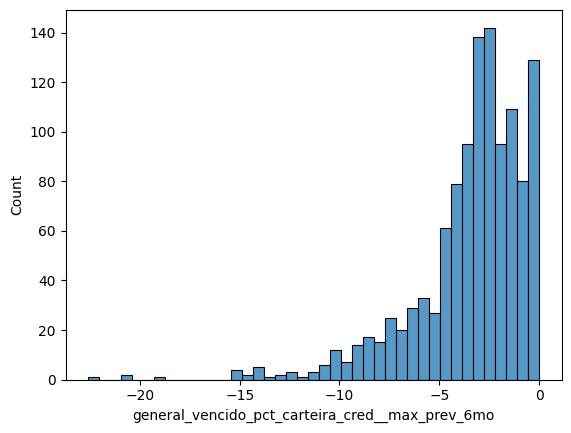

In [53]:
sns.histplot(np.log(train['general_vencido_pct_carteira_cred__max_prev_6mo']))
plt.show()

In [54]:
# calculating feature moments
skewness = train[features_to_keep].skew()
kurtosis = train[features_to_keep].kurt()

In [55]:
# skewness: negative values indicate left skewness, positive values indicate right skewness, and could be interpreted as follows:
# 0: symmetric distribution
# 0 to -1: moderately left skewed
# 0 to 1: moderately right skewed
# <-1: highly left skewed
# >1: highly right skewed

skewness.sort_values(ascending=False)

general_limite_trend_6mo                            69.245157
risco_total                                         53.617894
general_limite_de_cred_360m_sum                     46.803011
general_limite_de_cred_sum                          41.408371
general_vencido_sum                                 38.606113
general_lost_sum                                    36.130111
general_vencido_max_prev_6mo                        34.397200
general_lost_pct_cart_cred                          21.124096
v254r_cnt_board_memebers                            13.318586
general_vencido_pct_risco_max_prev_6mo               5.677590
general_vencido_sum_sum_pct_risco                    5.208594
general_lost_pct_risco                               5.085738
general_vencido_pct_carteira_cred__max_prev_6mo      4.872182
chk_esp_cred_rot_a_vencer_pct_risco                  4.852301
chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo     2.900678
cnt_declined_reasons                                 2.484941
years_si

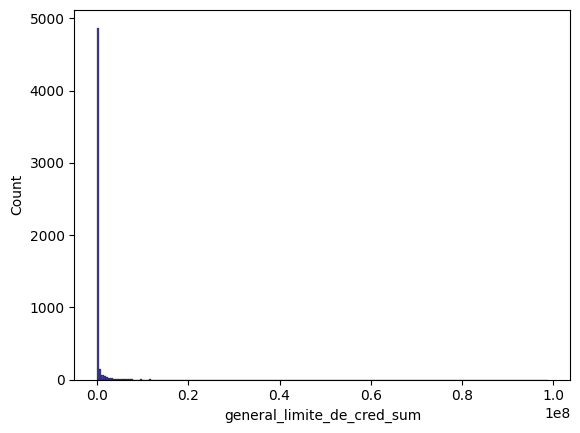

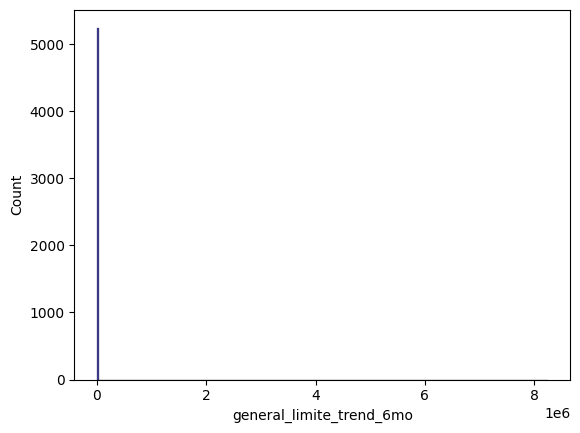

In [56]:
sns.histplot(train['general_limite_de_cred_sum'], bins=200, label='Moderately right skewed feature', color='navy')
plt.show()

sns.histplot(train['general_limite_trend_6mo'], bins=200, label='Highly right skewed feature', color='navy')
plt.show()

In [57]:
# kurtosis
# kurtosis > 0: May indicate outliers which are present away from the expected value of the distribution,
# and may be a sign of a heavy-tailed distribution.
kurtosis.sort_values(ascending=False)

general_limite_trend_6mo                            4922.094707
risco_total                                         3349.484659
general_limite_de_cred_360m_sum                     2632.023022
general_limite_de_cred_sum                          2204.550492
general_vencido_sum                                 1709.892026
general_vencido_max_prev_6mo                        1513.475772
general_lost_sum                                    1473.474235
general_lost_pct_cart_cred                           772.769688
v254r_cnt_board_memebers                             439.202346
general_vencido_pct_risco_max_prev_6mo                34.688082
general_vencido_sum_sum_pct_risco                     28.421428
general_lost_pct_risco                                26.850751
chk_esp_cred_rot_a_vencer_pct_risco                   25.333808
general_vencido_pct_carteira_cred__max_prev_6mo       24.559922
chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo       8.217103
years_since_first_relationship          

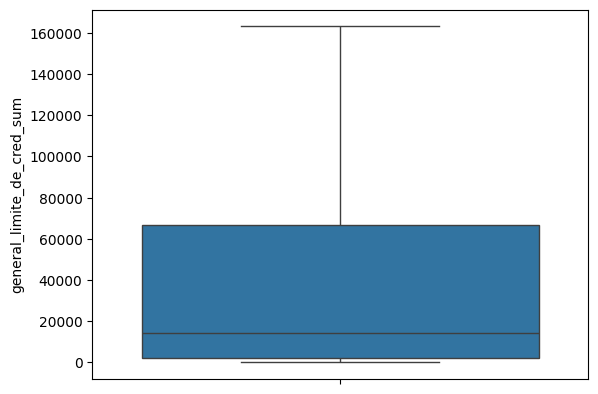

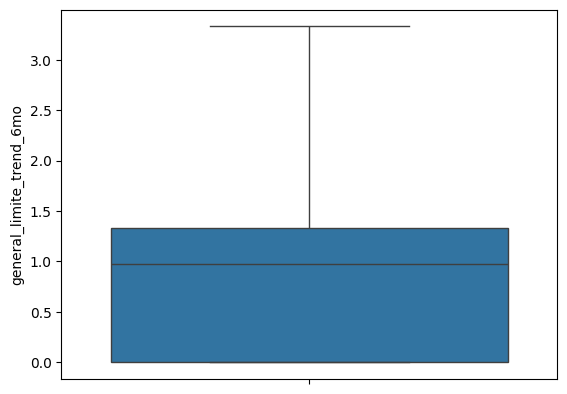

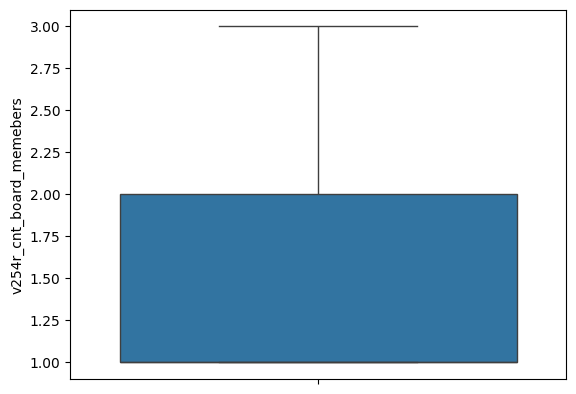

In [58]:
sns.boxplot(train['general_limite_de_cred_sum'], showfliers=False)
plt.show()

sns.boxplot(train['general_limite_trend_6mo'], showfliers=False)
plt.show()

sns.boxplot(train['v254r_cnt_board_memebers'], showfliers=False)
plt.show()

#### general_limite_de_cred_sum

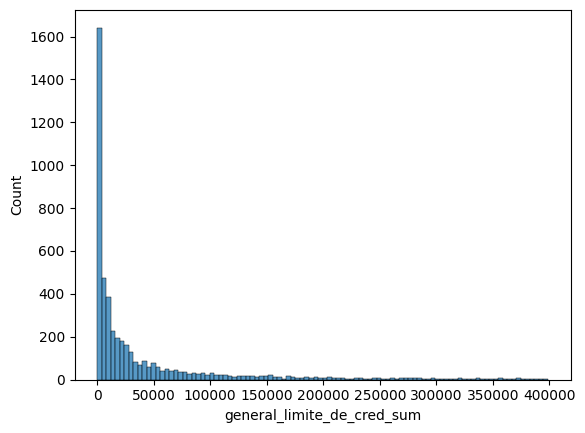

In [59]:
sns.histplot(train[train['general_limite_de_cred_sum'] <= 400000]['general_limite_de_cred_sum'], bins=100)
plt.show()

Percentage of values greater than 400000: 8.24%


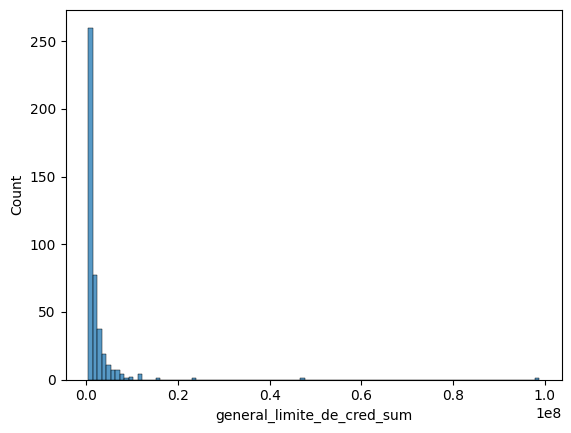

Percentage of values greater than 1000000: 4.44%


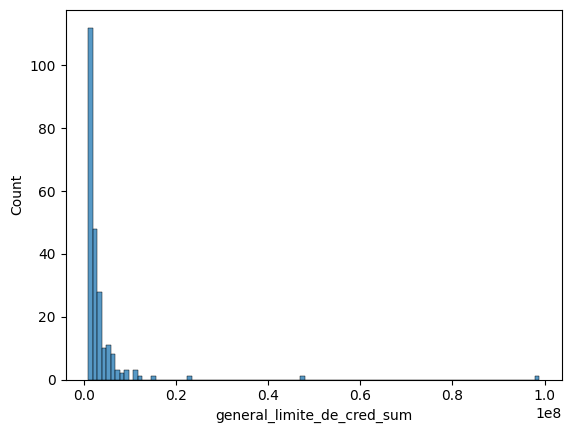

Percentage of values greater than 4000000: 0.86%


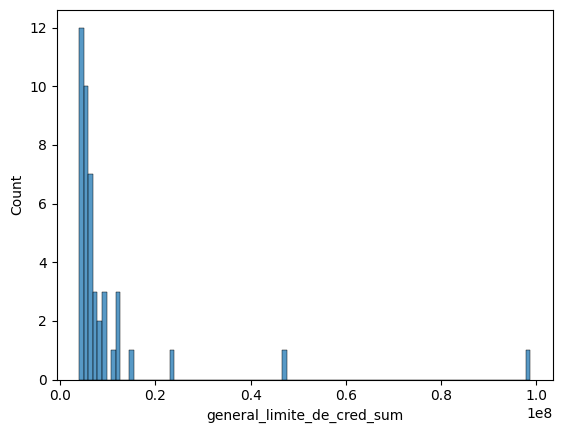

Percentage of values greater than 40000000: 0.04%


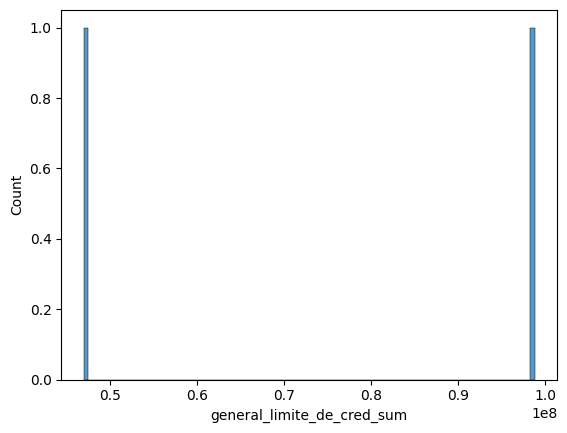

In [60]:
for value in [400000, 1000000, 4000000, 40000000]:
    print(f'Percentage of values greater than {value}: {(train["general_limite_de_cred_sum"] > value).value_counts(1)[True]:.2%}')
    sns.histplot(train[train['general_limite_de_cred_sum'] > value]['general_limite_de_cred_sum'], bins=100)
    plt.show()

In [61]:
# Companies with more than 4 million in credit limit are outliers, but they don't look like errors.
# A suggestion would be to have a separate credit risk pipeline for those companies, as they may
# be important for the revenue if we can deliver a good product for them.

#### general_limite_trend_6mo

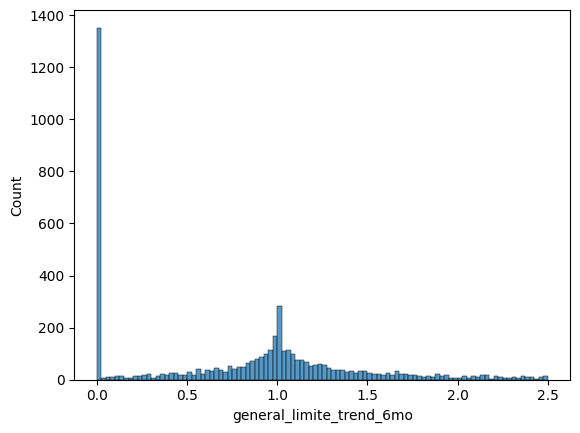

In [62]:
sns.histplot(train[train['general_limite_trend_6mo'] <= 2.5]['general_limite_trend_6mo'], bins=100)
plt.show()
# Similar to a Tweedie distribution

Percentage of values greater than 2.5: 10.30%


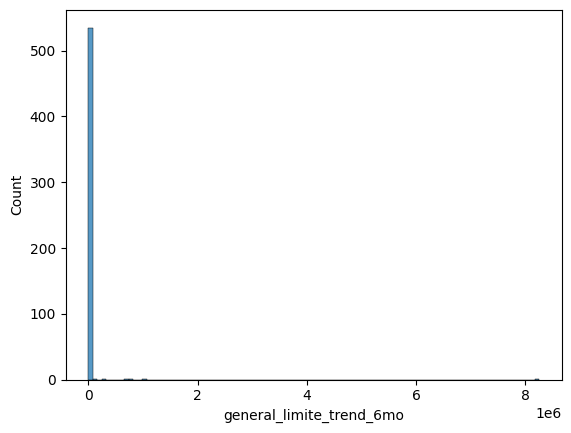

Percentage of values greater than 10: 2.40%


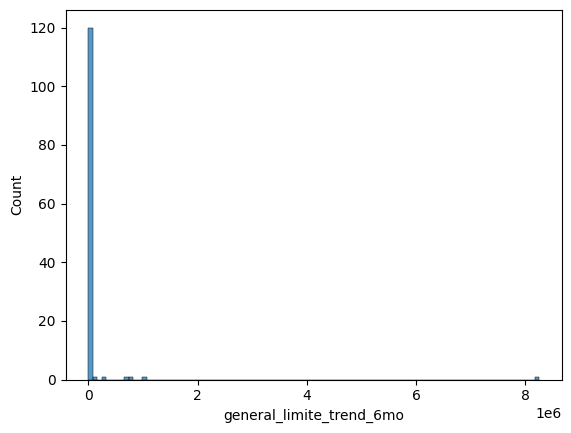

Percentage of values greater than 1000: 0.15%


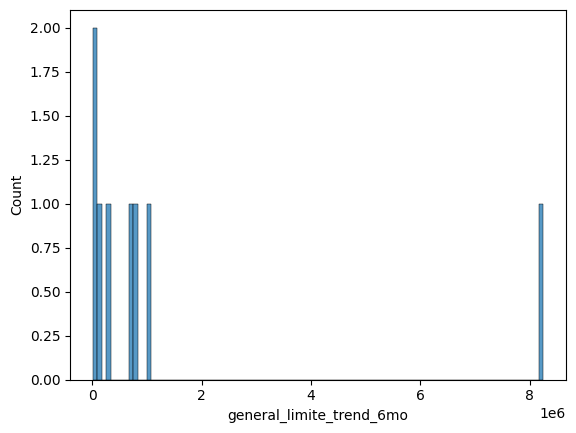

Percentage of values greater than 10000: 0.11%


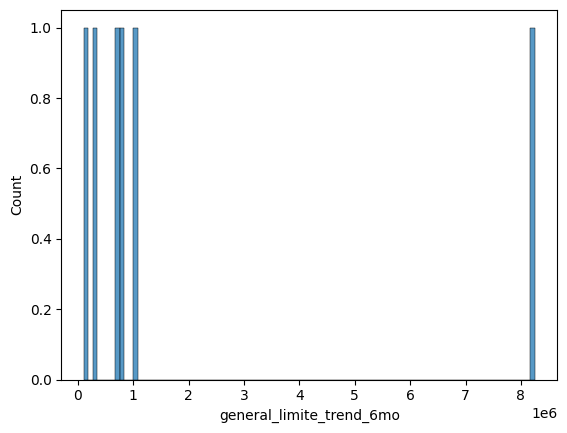

In [63]:
for value in [2.5, 10, 1000, 10000]:
    print(f'Percentage of values greater than {value}: {(train["general_limite_trend_6mo"] > value).value_counts(1)[True]:.2%}')
    sns.histplot(train[train['general_limite_trend_6mo'] > value]['general_limite_trend_6mo'], bins=100)
    plt.show()

Percentage of values greater than 2.5: 10.30%


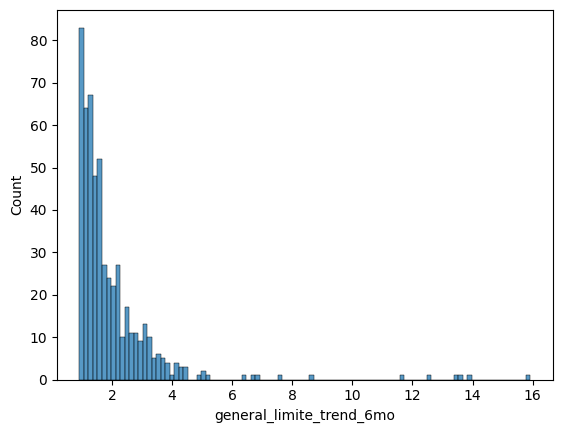

Percentage of values greater than 10: 2.40%


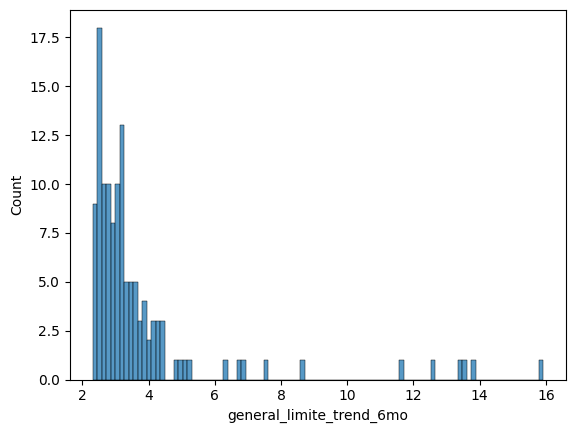

Percentage of values greater than 1000: 0.15%


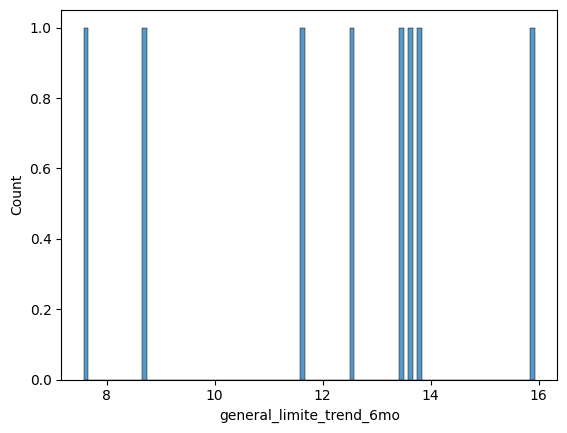

Percentage of values greater than 10000: 0.11%


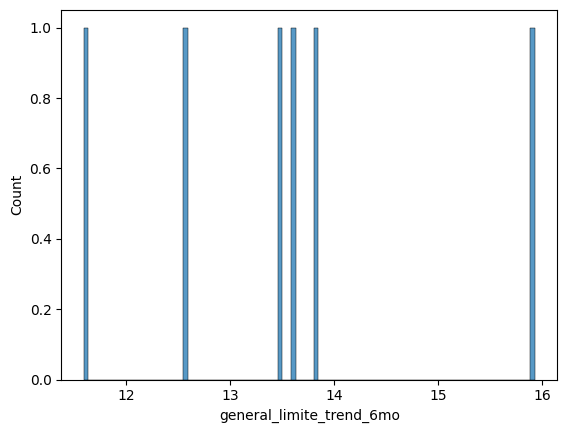

In [64]:
for value in [2.5, 10, 1000, 10000]:
    print(f'Percentage of values greater than {value}: {(train["general_limite_trend_6mo"] > value).value_counts(1)[True]:.2%}')
    sns.histplot(np.log(train[train['general_limite_trend_6mo'] > value]['general_limite_trend_6mo']), bins=100, label=f'log({value})')
    plt.show()

In [65]:
# A capper to this feature may be useful, as the right tail contains a few cases with high feature values.
# The log transformation may also be useful, as it may help to reduce the right skewness of the feature.

c:\Users\nbeha\anaconda3\envs\credit-model\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


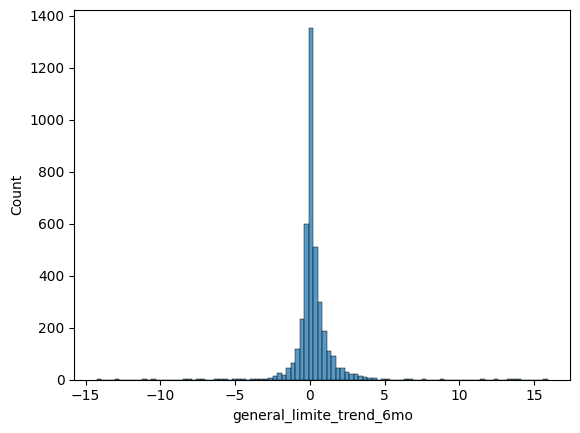

In [66]:
sns.histplot(np.log(train['general_limite_trend_6mo']), bins=100, label=f'log({value})')
plt.show()

#### v254r_cnt_board_memebers

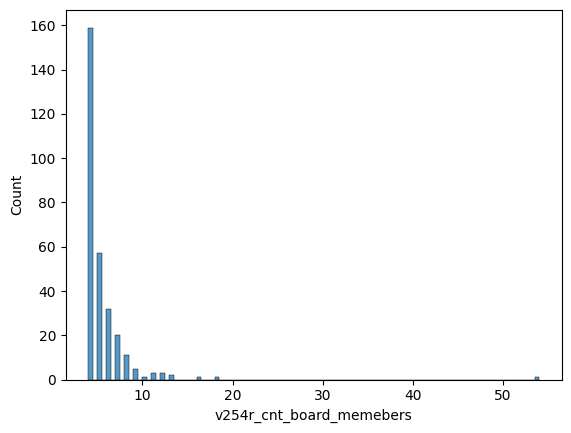

In [67]:
sns.histplot(train[train['v254r_cnt_board_memebers'] > 3]['v254r_cnt_board_memebers'], bins=100)
plt.show()

In [68]:
train['v254r_cnt_board_memebers'].value_counts(1)

v254r_cnt_board_memebers
1     0.522178
2     0.346849
3     0.074624
4     0.030268
5     0.010851
6     0.006092
7     0.003807
8     0.002094
9     0.000952
12    0.000571
11    0.000571
13    0.000381
16    0.000190
18    0.000190
10    0.000190
54    0.000190
Name: proportion, dtype: float64

In [69]:
# general_limite_trend_6mo
# is_not_able_to_calc_interest

features_to_keep


['v204r_is_popular_domain',
 'days_since_oldest_board_member',
 'risco_total',
 'cnt_declined_reasons',
 'general_limite_de_cred_360m_sum',
 'general_lost_pct_risco',
 'general_vencido_max_prev_6mo',
 'general_vencido_sum',
 'is_not_able_to_calc_interest',
 'general_lost_sum',
 'general_lost_pct_cart_cred',
 'general_a_vencer_weighted_periodo_div_pct_risco',
 'years_since_first_relationship',
 'general_limite_de_cred_sum_pct_risco',
 'general_vencido_pct_risco_max_prev_6mo',
 'v254r_cnt_board_memebers',
 'general_limite_de_cred_sum',
 'general_limite_trend_6mo',
 'chk_esp_cred_rot_a_vencer_pct_risco',
 'general_vencido_sum_sum_pct_risco',
 'general_vencido_pct_carteira_cred__max_prev_6mo',
 'general_a_vencer_pct_risco',
 'chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo']

In [70]:
train[keys + ['general_limite_trend_6mo']].head(50).sort_values(['fake_cnpj', 'date_reference'])

,fake_cnpj,date_reference,general_limite_trend_6mo
0,27,2021-05-01,1.182237
1,76,2021-05-01,0.980906
2,82,2020-12-01,1.230621
3,141,2020-10-01,1.012991
4,145,2021-04-01,0.951969
5,160,2020-11-01,1.332320
6,175,2020-12-01,1.955572
7,177,2021-04-01,1.173206
8,198,2021-03-01,0.904606
9,215,2021-04-01,1.548283


In [71]:
train['is_not_able_to_calc_interest'].value_counts()

is_not_able_to_calc_interest
1    2024
0    1561
2     949
3     473
4     154
5      60
6      22
8       5
7       3
9       2
Name: count, dtype: int64

# Wrap up the EDA and list features to keep, transform and build

In [72]:
sorted(features_to_keep)

['chk_esp_cred_rot_a_vencer_pct_risco',
 'chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo',
 'cnt_declined_reasons',
 'days_since_oldest_board_member',
 'general_a_vencer_pct_risco',
 'general_a_vencer_weighted_periodo_div_pct_risco',
 'general_limite_de_cred_360m_sum',
 'general_limite_de_cred_sum',
 'general_limite_de_cred_sum_pct_risco',
 'general_limite_trend_6mo',
 'general_lost_pct_cart_cred',
 'general_lost_pct_risco',
 'general_lost_sum',
 'general_vencido_max_prev_6mo',
 'general_vencido_pct_carteira_cred__max_prev_6mo',
 'general_vencido_pct_risco_max_prev_6mo',
 'general_vencido_sum',
 'general_vencido_sum_sum_pct_risco',
 'is_not_able_to_calc_interest',
 'risco_total',
 'v204r_is_popular_domain',
 'v254r_cnt_board_memebers',
 'years_since_first_relationship']

In [73]:
manually_removed_features = ['general_limite_de_cred_360m_sum']

In [74]:
def create__general_lost_sum__over__general_limite_de_cred_sum(df: pd.DataFrame) -> pd.DataFrame:
    df['general_lost_sum__over__general_limite_de_cred_sum'] = df['general_lost_sum'] / df['general_limite_de_cred_sum']
    return df

def create__general_vencido_sum__over__general_limite_de_cred_sum(df: pd.DataFrame) -> pd.DataFrame:
    df['general_vencido_sum__over__general_limite_de_cred_sum'] = df['general_vencido_sum'] / df['general_limite_de_cred_sum']
    return df

features_to_remove_after_new_features_are_added = ['general_lost_sum', 'general_limite_de_cred_sum', 'general_vencido_sum']

In [75]:
final_features = set(features_to_keep) - set(manually_removed_features) - set(features_to_remove_after_new_features_are_added)
final_features

{'chk_esp_cred_rot_a_vencer_pct_risco',
 'chk_esp_cred_rot_a_vencer_pct_risco_max_prev_6mo',
 'cnt_declined_reasons',
 'days_since_oldest_board_member',
 'general_a_vencer_pct_risco',
 'general_a_vencer_weighted_periodo_div_pct_risco',
 'general_limite_de_cred_sum_pct_risco',
 'general_limite_trend_6mo',
 'general_lost_pct_cart_cred',
 'general_lost_pct_risco',
 'general_vencido_max_prev_6mo',
 'general_vencido_pct_carteira_cred__max_prev_6mo',
 'general_vencido_pct_risco_max_prev_6mo',
 'general_vencido_sum_sum_pct_risco',
 'is_not_able_to_calc_interest',
 'risco_total',
 'v204r_is_popular_domain',
 'v254r_cnt_board_memebers',
 'years_since_first_relationship'}